In [34]:
# Handle/Filter warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn import metrics
# from yellowbrick.classifier import ClassificationReport, ROCAUC

In [35]:
df = pd.read_csv('bank-full.csv')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Exploratory data quality report

##### shape of the data

In [36]:

df.shape

(45211, 17)

 ##### Check info/description
 The information shows that there are 17 variables and 45211 observations. 
 All the variables have 45211 records, indicating that there is no missing value in the data, 
 although there might be wrongly entered data or errors, which can also lead to outliers

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [38]:
# data types
print df.dtypes

df.isnull().any()

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object


age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

#### Missing values
There is no missing value, however we might have some wrong values like unknown or etc which can lead to outliers, so we will check for outliers next

In [39]:
# taking a count of the values
# Value counts of allcolumns

for index, value in enumerate(df.columns):
    print 'Value counts for', value
    print df[value].value_counts()
    print '\n\n'

Value counts for age
32    2085
31    1996
33    1972
34    1930
35    1894
36    1806
30    1757
37    1696
39    1487
38    1466
40    1355
41    1291
42    1242
45    1216
29    1185
46    1175
43    1161
44    1136
47    1088
28    1038
48     997
49     994
50     939
51     936
52     911
27     909
53     891
57     828
54     811
55     806
      ... 
67      54
71      54
72      52
20      50
77      44
73      44
69      44
75      39
74      37
68      36
19      35
76      32
80      31
78      30
79      25
83      22
82      19
81      17
18      12
84       9
86       9
85       5
87       4
89       3
88       2
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64



Value counts for job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknow

##### Description of the data
 This is the begining of outlier detection as we can inspect the values from the table below
 We can see that the minimum value for 'balance' is -8019, which looks like an error/outlier

In [40]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Detecting outliers using Skewness

In [41]:
for column in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
    print column, ":", df[column].skew()
    print

age : 0.6848179257252598

balance : 8.360308326166326

day : 0.09307901402122411

duration : 3.144318099423456

campaign : 4.898650166179674

pdays : 2.6157154736563477

previous : 41.84645447266292



The skewness value should be btw -1 and 1 if the data is normally distributed    
from the information of the skewness value, balance is skewed to the right, therefore contains outliers 
from the information of the skewness value, previous is very skewed to the right, therefore contains outliers 
from the information of the skewness value, campaign is skewed to the right, therefore contains outliers  
from the information of the skewness value, duration is skewed to the right, therefore contains outliers
from the information of the skewness value, pdays is also skewed

from the information of the skewness value, day is not skewed, therefore contains no outliers

#### Detecting outliers using graph

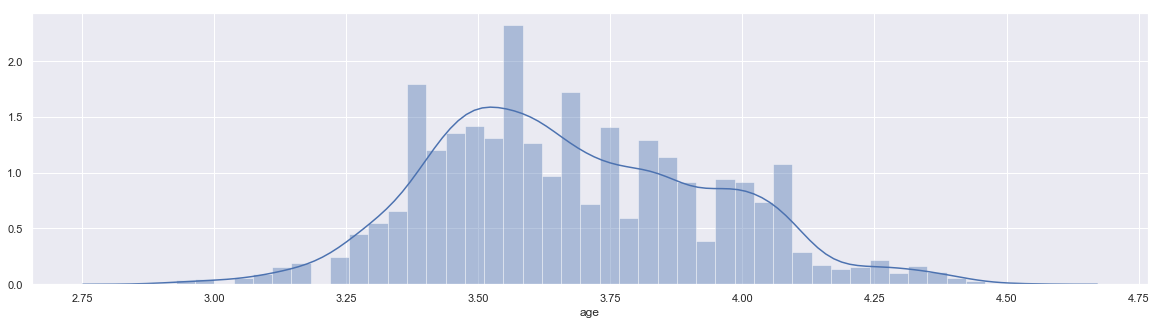

dist plot for  age


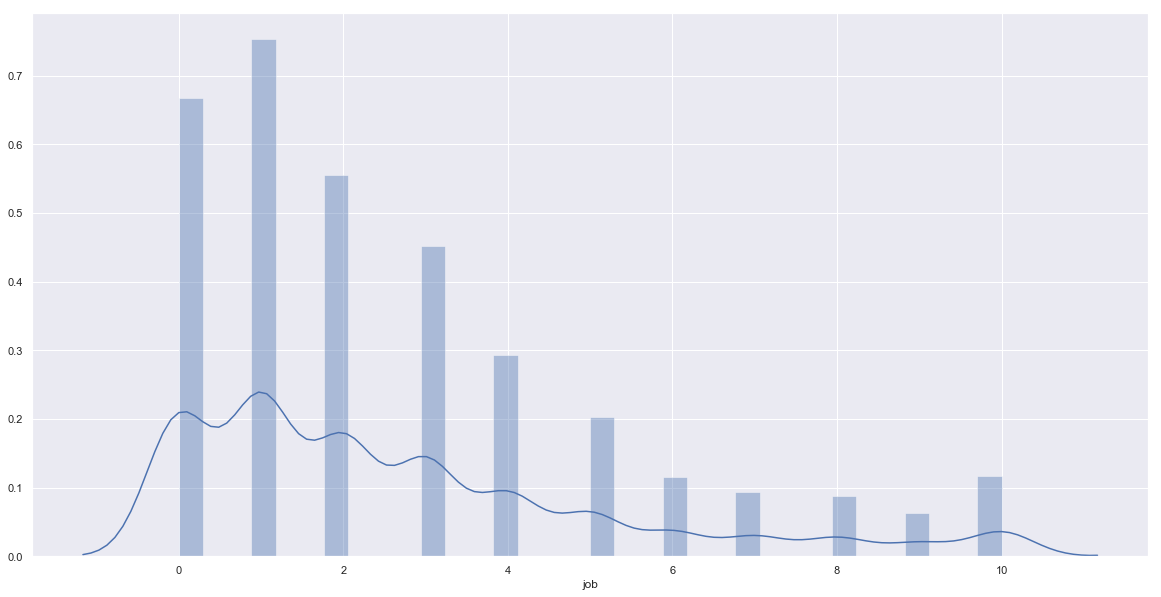

dist plot for  job


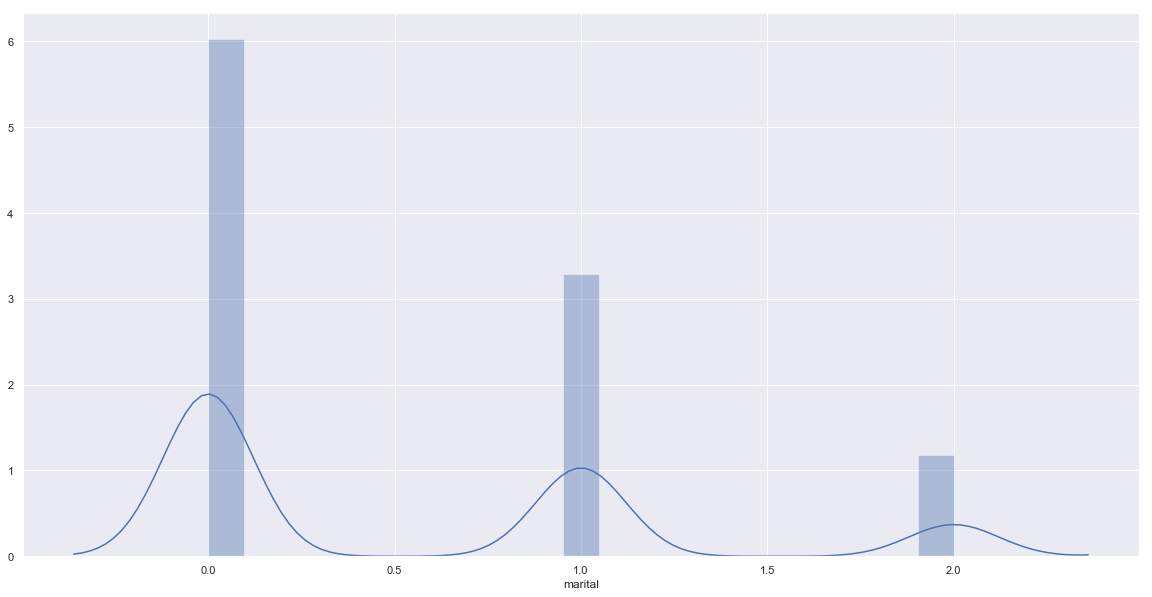

dist plot for  marital


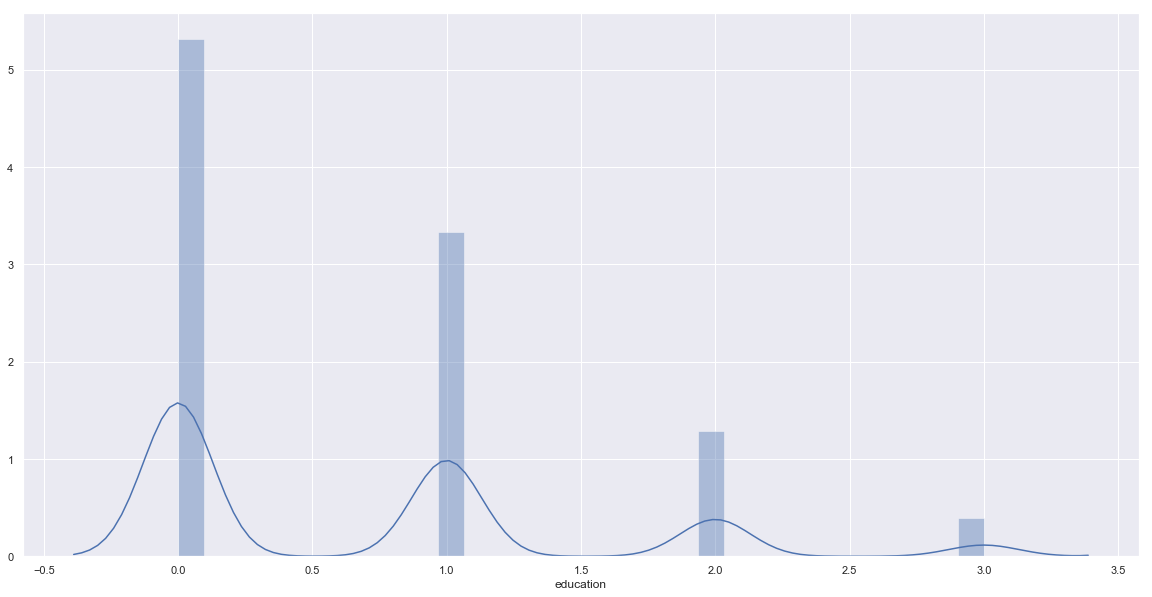

dist plot for  education


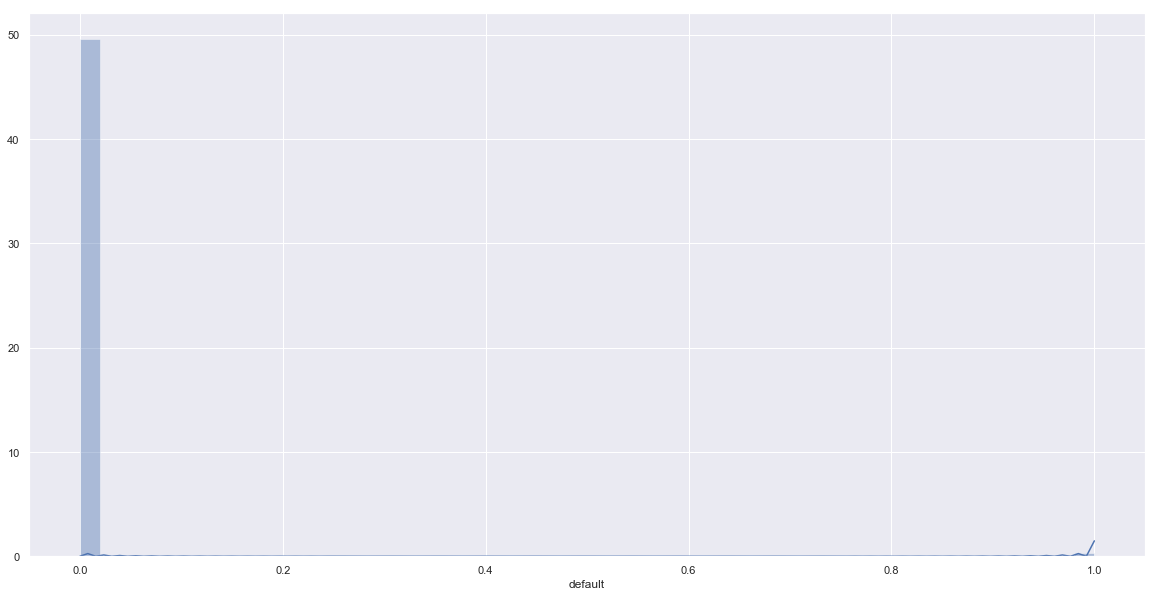

dist plot for  default


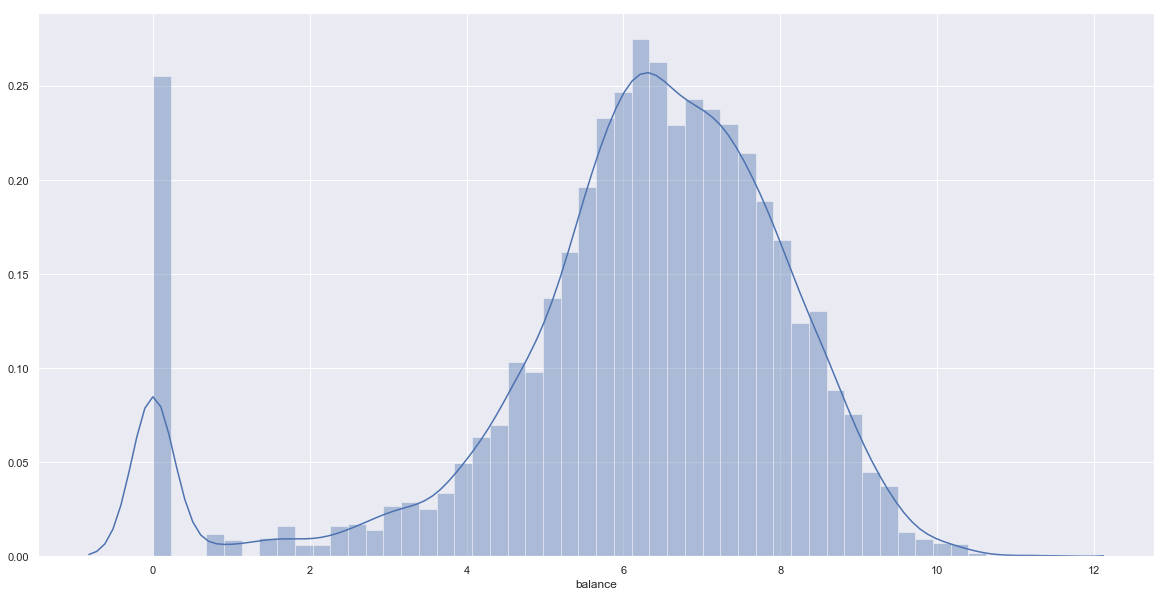

dist plot for  balance


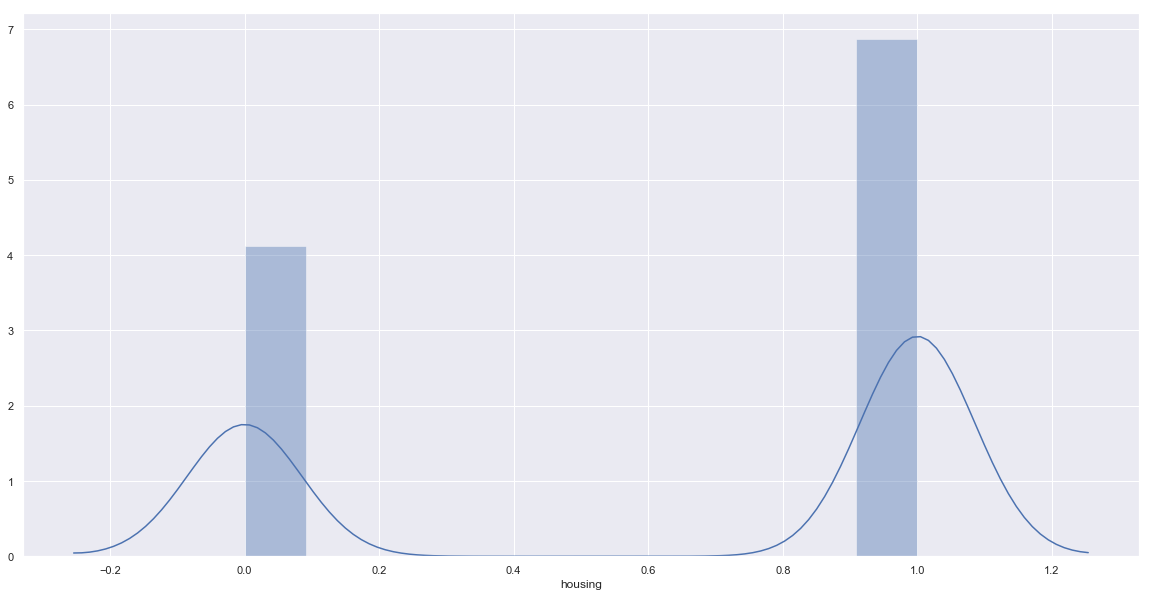

dist plot for  housing


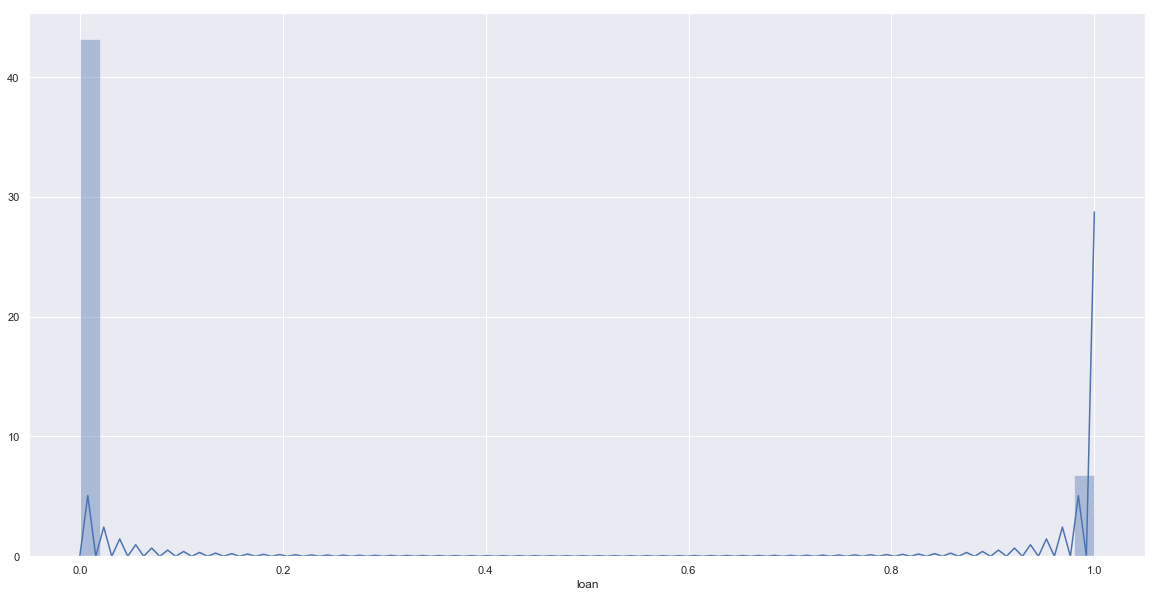

dist plot for  loan


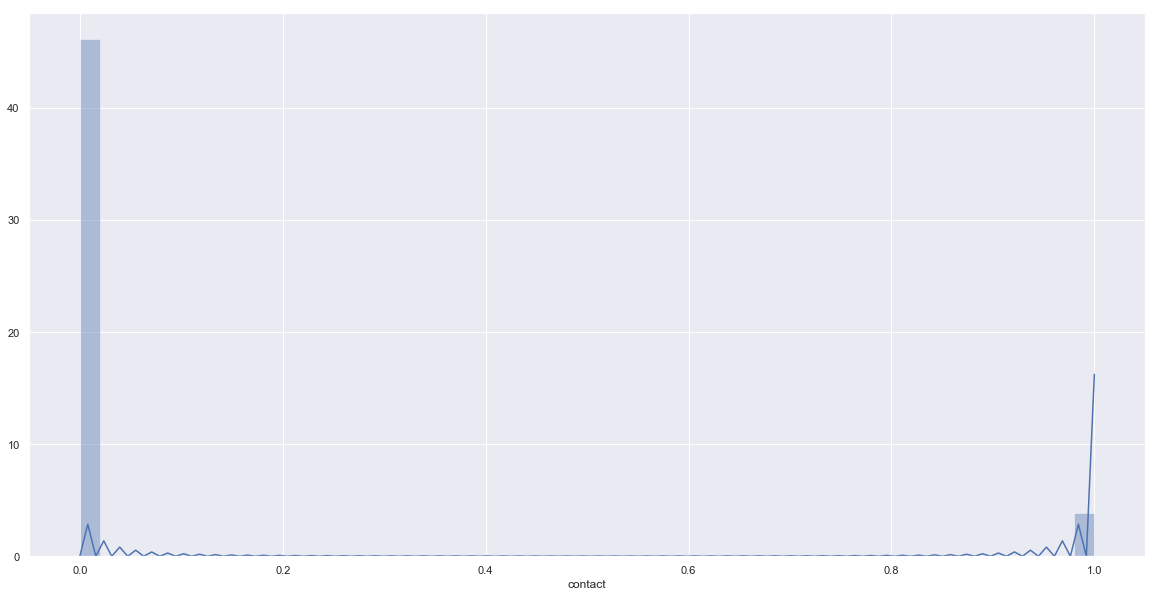

dist plot for  contact


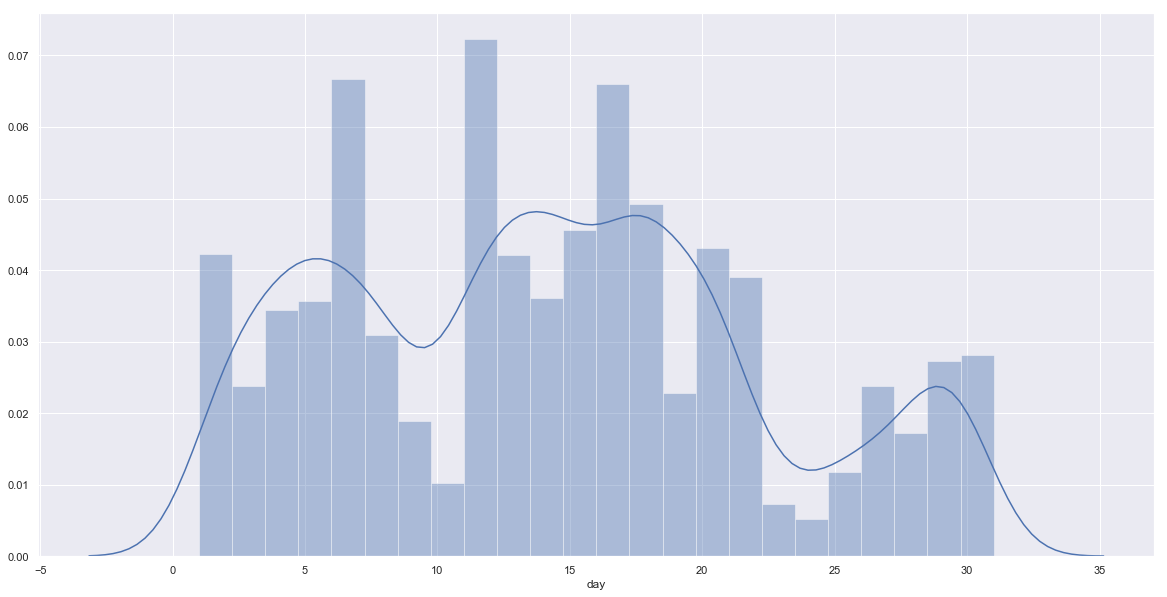

dist plot for  day


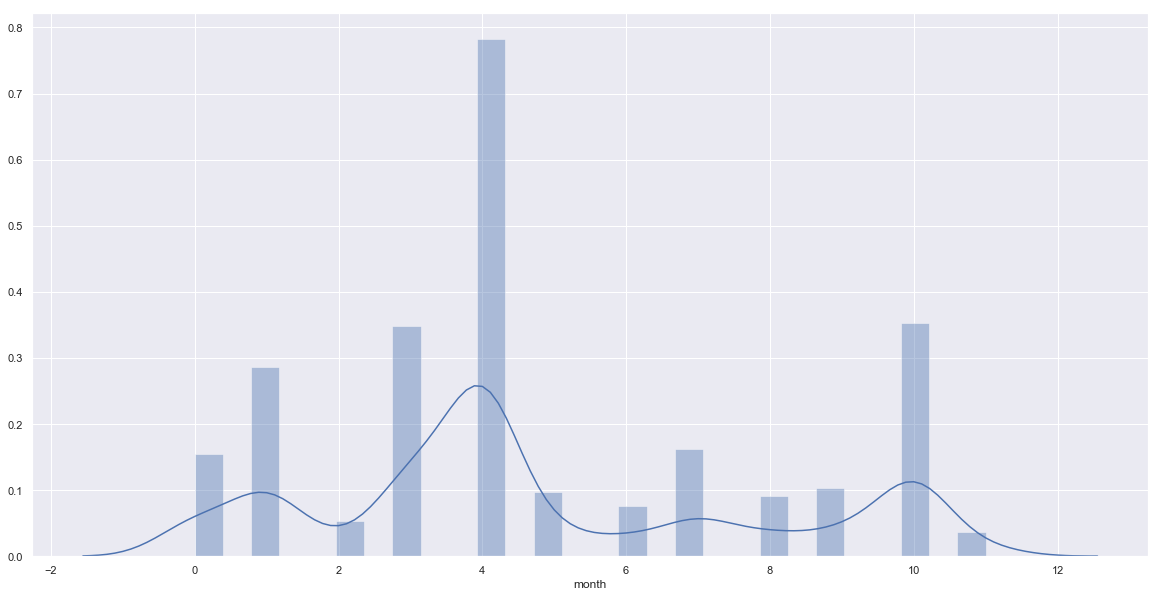

dist plot for  month


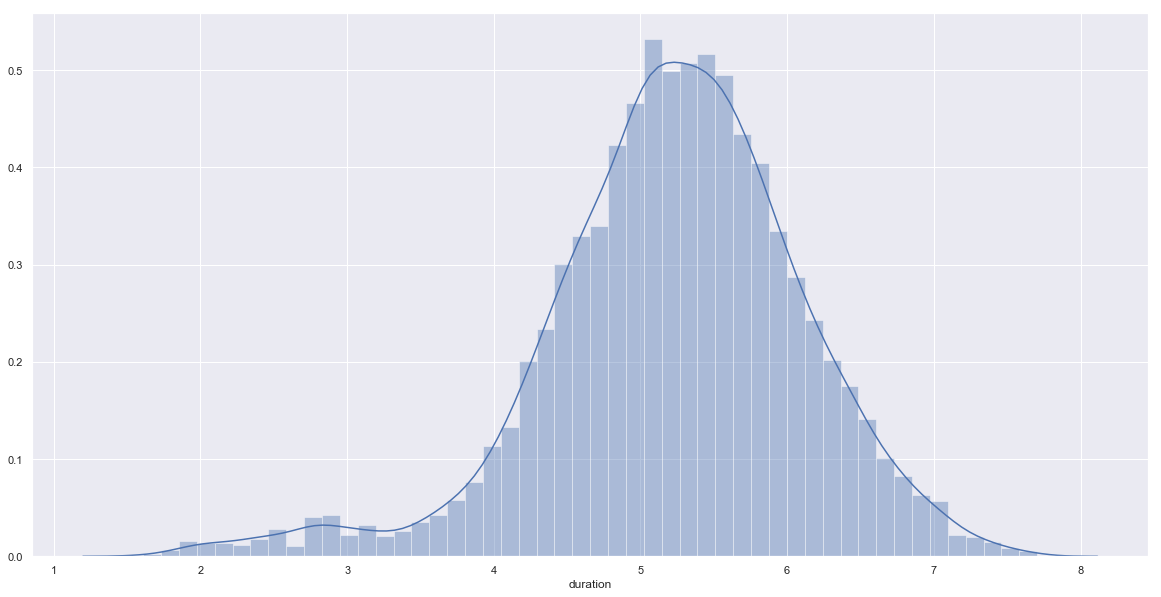

dist plot for  duration


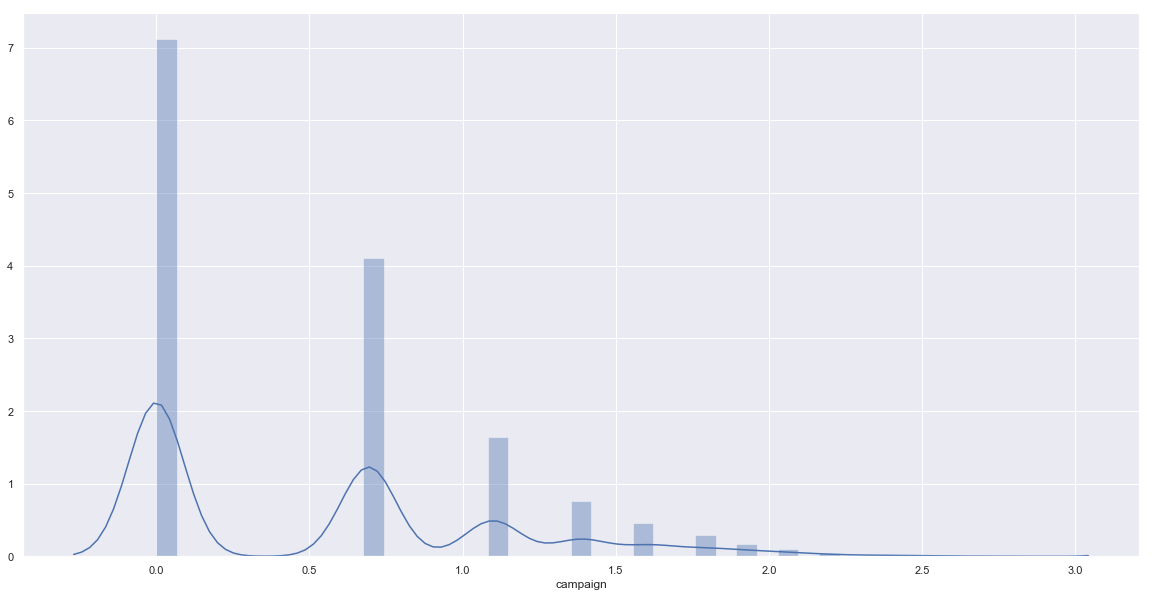

dist plot for  campaign


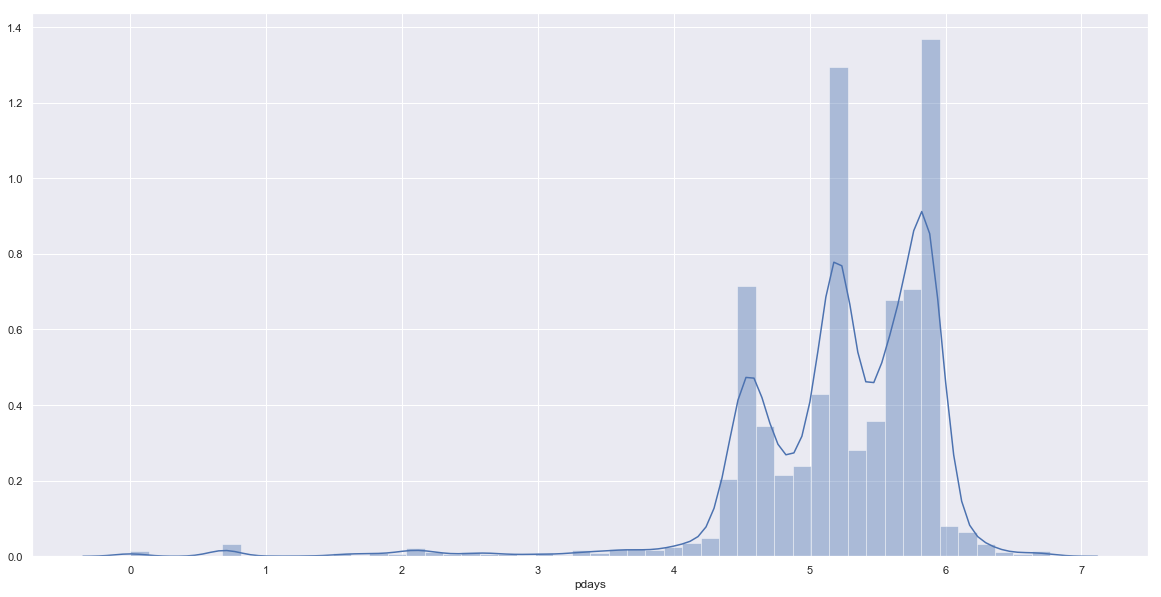

dist plot for  pdays


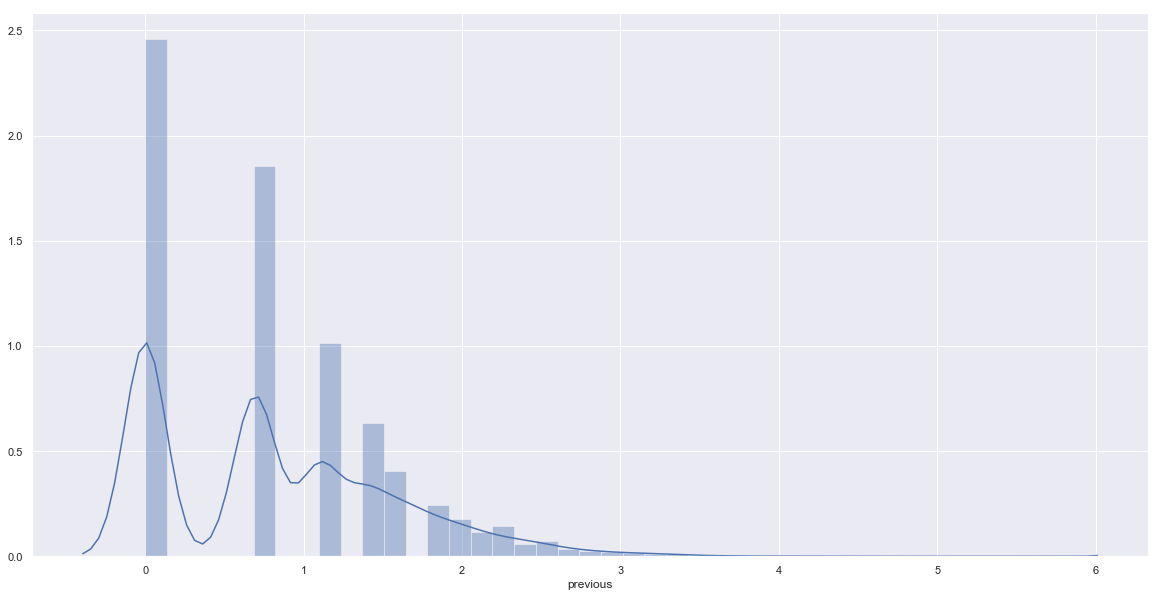

dist plot for  previous


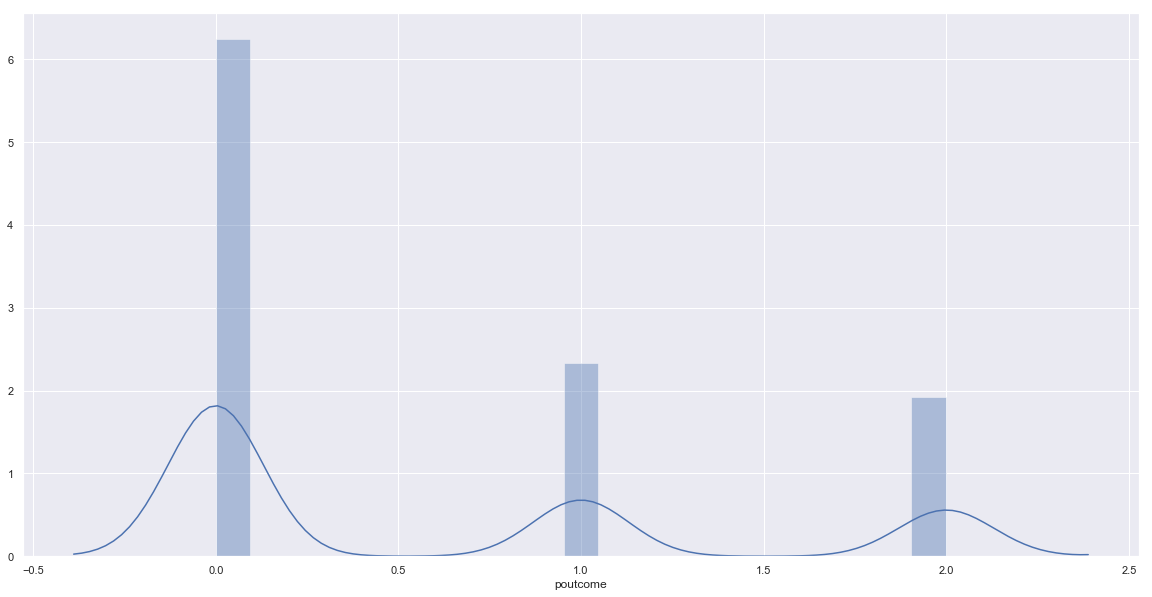

dist plot for  poutcome


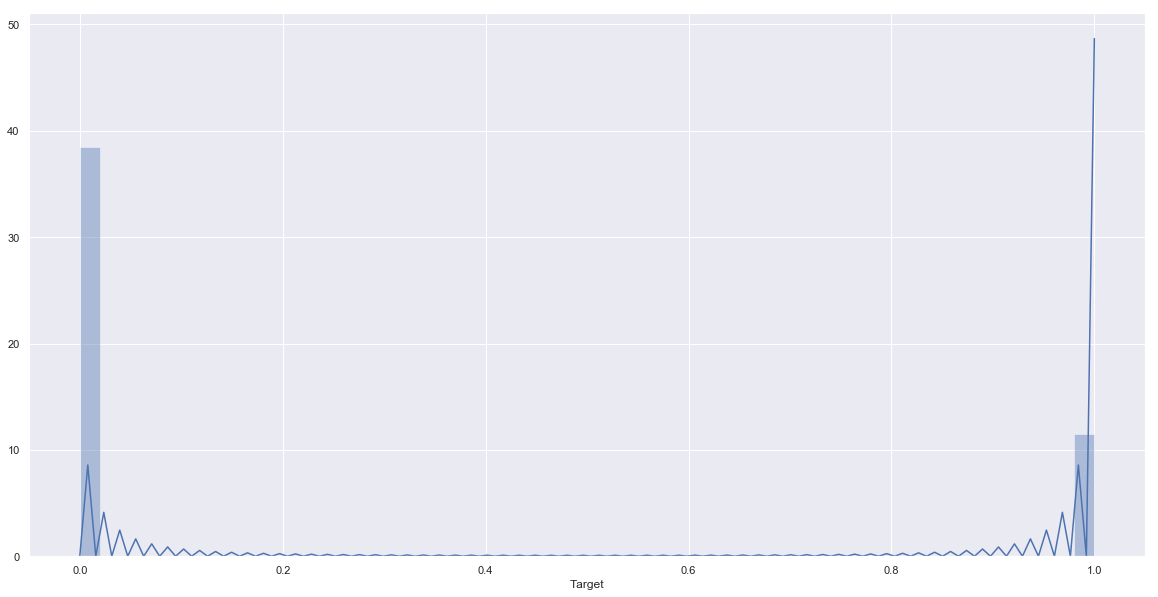

dist plot for  Target


In [90]:
plt.figure(figsize=(20,5))
for column in list(df.columns):
    sns.distplot(df[column])
    plt.show()
    print "dist plot for ", column

Looking at the  target column distribution here we find Target' is imbalanced i.e. One class dominates over other class. In other words, frequecy of entries in one class is comparatively higher than other class, in this case its '0' class

The following columns have a multiodal distribution: poutcome, previous, pdays, campaign, month, education

The following columns are imbalanced: Target, contact, loan

The housing column is bi modal

The balance column has an outlier as a result of the -1 values

Age is close to a normal distribution

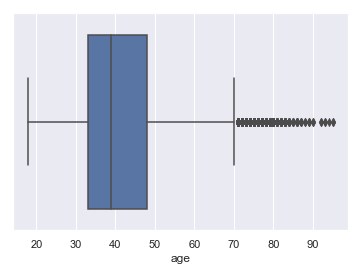

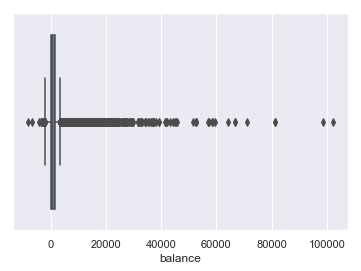

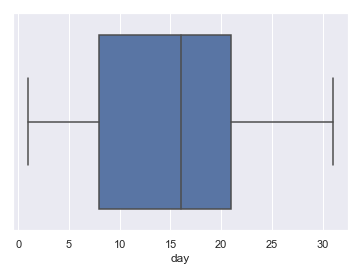

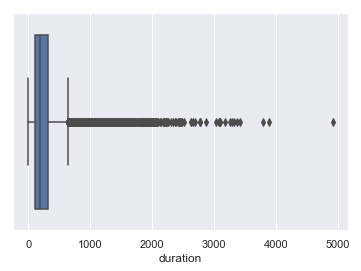

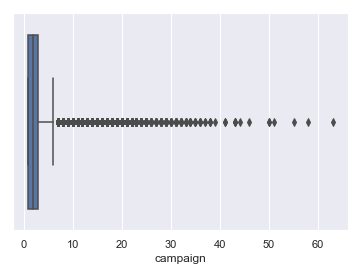

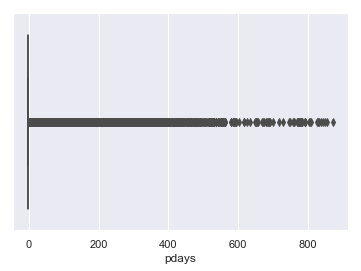

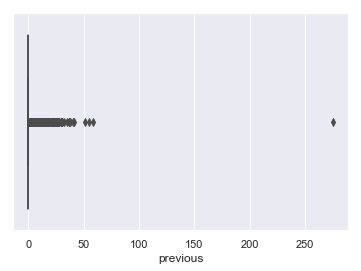

In [43]:
def plotBox (column):
    sns.boxplot(x=df[column])
    plt.show()
    
    
for column in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
    plotBox(column)
    

### Age has  outliers on the right
### Balance has few outliers to the left, and lots of outliers on the right
### Day does not have outliers
### Duration has lots of outliers to the right
### Campaign has outliers to the right
### Pdays has outliers
### Previous has outliers

## Handling Data pollution

#### From all indictions, we have some wrong/polluted data in our dataset, we can that by:
#### 1) Replacing them with Nan, and later dropping them
#### 2) Replacing them with a central value, such as median, mean, mode
#### 3) Leave them untouched and get dummy variable created for them. They might not be missing values and might present some insights that the model can capture.

#### In this case i will be replacing them with nan, then droping all nan values

#### Since its always better to work with numerical values rather than categorical/object we will also convert the columns


In [44]:
# converting job column
df['job'] = df['job'].replace({
    'blue-collar': 0,
    'management': 1,
    'technician': 2,
    'admin.': 3,
    'services': 4,
    'retired': 5,
    'self-employed': 6,
    'entrepreneur': 7,
    'unemployed': 8,
    'housemaid': 9,
    'student': 10,
    'unknown': np.nan
})
# df['job'].dropna(inplace=True)

# converting marital column
df['marital'] = df['marital'].replace({
    'married': 0,
    'single': 1,
    'divorced': 2
})
# df['marital'].dropna(inplace=True)

# converting education column
df['education'] = df['education'].replace({
    'secondary': 0,
    'tertiary': 1,
    'primary': 2,
    'unknown': 3
})
# df['education'].dropna(inplace=True)

# converting default column
df['default'] = df['default'].replace({
    'no': 0,
    'yes': 1
})

# converting housing column
df['housing'] = df['housing'].replace({
    'yes': 1,
    'no': 0
})

# converting loan column
df['loan'] = df['loan'].replace({
    'no': 0,
    'yes': 1
})

# converting contact column
df['contact'] = df['contact'].replace({
    'cellular': 0,
    'unknown': np.nan,
    'telephone': 1
})

# converting month column
df['month'] = df['month'].replace({
    'may': 4,
    'jul': 6,
    'aug': 7,
    'jun': 5,
    'nov': 10,
    'apr': 3,
    'feb': 1,
    'jan': 0,
    'oct': 9,
    'sep': 8,
    'mar': 2,
    'dec': 11,
})

# converting poutcome column
df['poutcome'] = df['poutcome'].replace({
    'unknown': np.nan,
    'failure': 0,
    'other': 1,
    'success': 2
})

# converting target column
df['Target'] = df['Target'].replace({
    'no': 0,
    'yes': 1
})


I noticed that there are negative values in balance, I will assume its a mistake and tske the positive version of the values. also, pdays has a negative value, -1, on puropse to denote a person has not been contacted or contact period is beyond 900 days so we will leave as is

In [45]:
df['balance'] = df['balance'].abs()

check for nan values again, we should have nan values now

In [46]:
df.isnull().any()

age          False
job           True
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
Target       False
dtype: bool

drop nan columns

In [47]:
df.dropna(inplace=True)

In [48]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24060,33,3.0,0,1,0,882,0,0,1.0,21,9,39,1,151,3,0.0,0
24062,42,3.0,1,0,0,247,1,1,1.0,21,9,519,1,166,1,1.0,1
24064,33,4.0,0,0,0,3444,1,0,1.0,21,9,144,1,91,4,0.0,1
24072,36,1.0,0,1,0,2415,1,0,1.0,22,9,73,1,86,4,1.0,0
24077,36,1.0,0,1,0,0,1,0,1.0,23,9,140,1,143,3,0.0,1


### Treatment of outliers

We can handle outliers using

a) Log Transformation

b) Replacing Outliers with Central Values such as Median

c) Drop the outliers if there is no significant data loss

I will go with the log transformation strategy

In [49]:
columns_with_outliers = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for column in columns_with_outliers:
    print column, ": value of skewness before log transformation", df[column].skew()
    df[column] = df[column].map(lambda i: np.log(i) if i > 0 else 0)
    print column, ": value of skewness after log transformation", df[column].skew()
    print
    

age : value of skewness before log transformation 0.9695033219274147
age : value of skewness after log transformation 0.29879608926157075

balance : value of skewness before log transformation 8.22372139975035
balance : value of skewness after log transformation -1.2976537028361776

duration : value of skewness before log transformation 2.553623000884499
duration : value of skewness after log transformation -0.6205052626733906

campaign : value of skewness before log transformation 2.4253351754668144
campaign : value of skewness after log transformation 0.8101905437508174

pdays : value of skewness before log transformation 0.5084835683976185
pdays : value of skewness after log transformation -2.6611329444205287

previous : value of skewness before log transformation 27.952769104558296
previous : value of skewness after log transformation 0.7008101840377485



we can see that we were able to handle the skewness of age, balance, duration, campaign while pdays and previous still seem to be skewed

#### Visualizing the data after outlier treatment

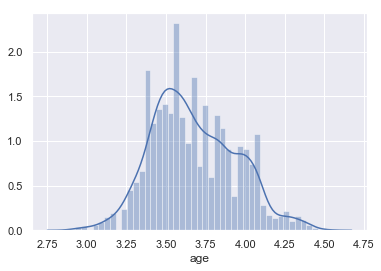

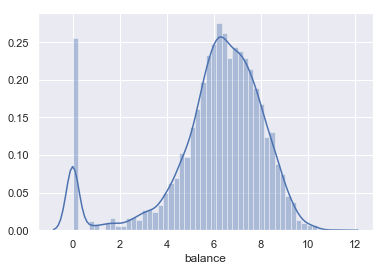

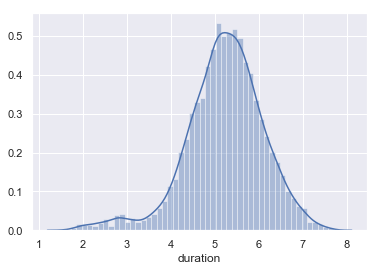

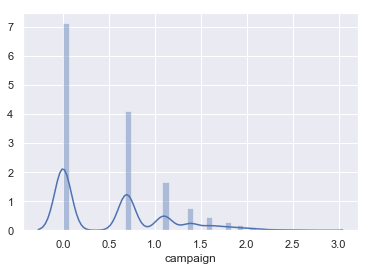

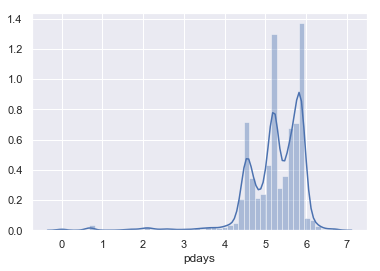

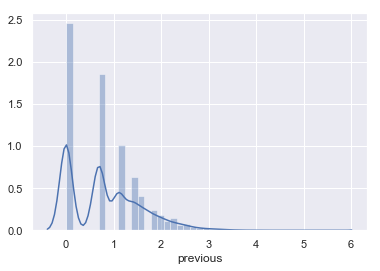

In [50]:
for column in columns_with_outliers:
    sns.distplot(df[column])
    plt.show()

## Bivariate Analysis

Using Pairplot

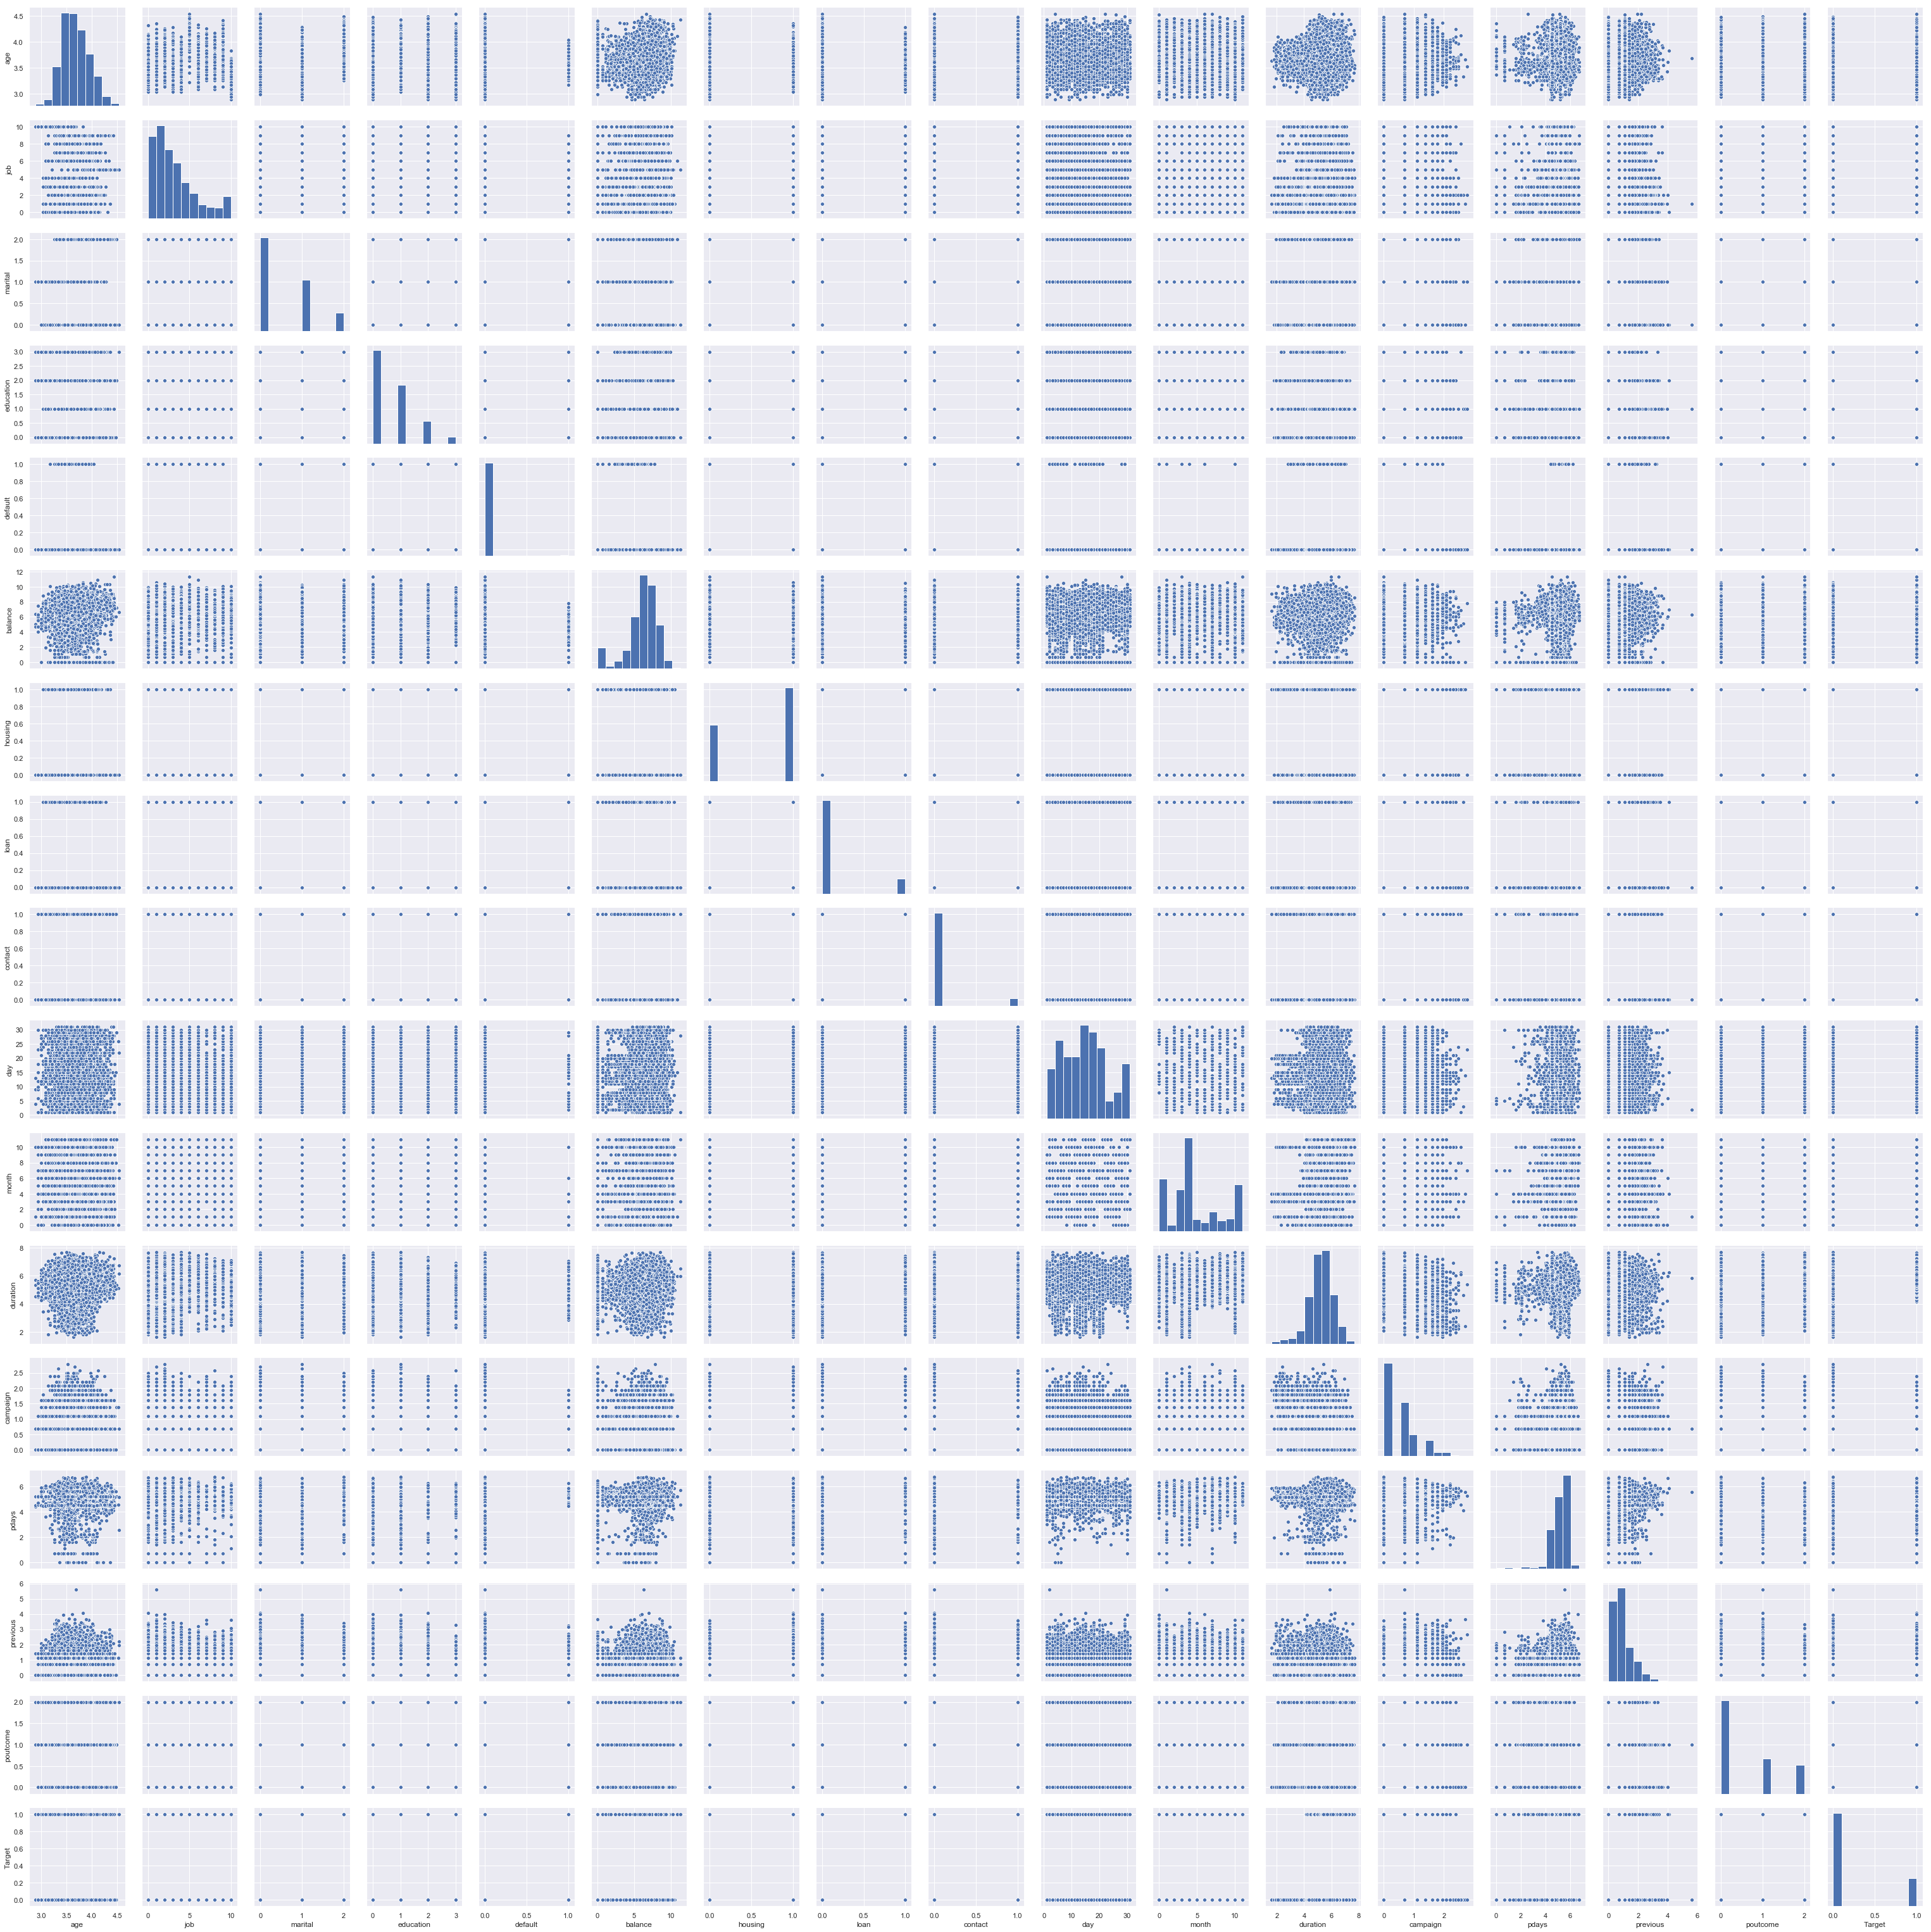

In [51]:
sns.pairplot(df)

Checking Correlation between the variables and the target

In [52]:
for column in list(df.columns):
    cor = df[column].corr(df["Target"])
    print "The correlation btw ", column, "and target is ", cor
    print
    

The correlation btw  age and target is  0.04631985155847643

The correlation btw  job and target is  0.10766254538826465

The correlation btw  marital and target is  0.006674842089895758

The correlation btw  education and target is  0.03633945872502352

The correlation btw  default and target is  -0.028389664787829186

The correlation btw  balance and target is  0.07760640038654026

The correlation btw  housing and target is  -0.32001466156350605

The correlation btw  loan and target is  -0.11718511601420055

The correlation btw  contact and target is  -0.007456898490865173

The correlation btw  day and target is  0.029406827197487256

The correlation btw  month and target is  0.12129156608125476

The correlation btw  duration and target is  0.3642169300192843

The correlation btw  campaign and target is  -0.08878311280156881

The correlation btw  pdays and target is  -0.12360607294748185

The correlation btw  previous and target is  0.04249303465469493

The correlation btw  poutcome 

Using heatmap

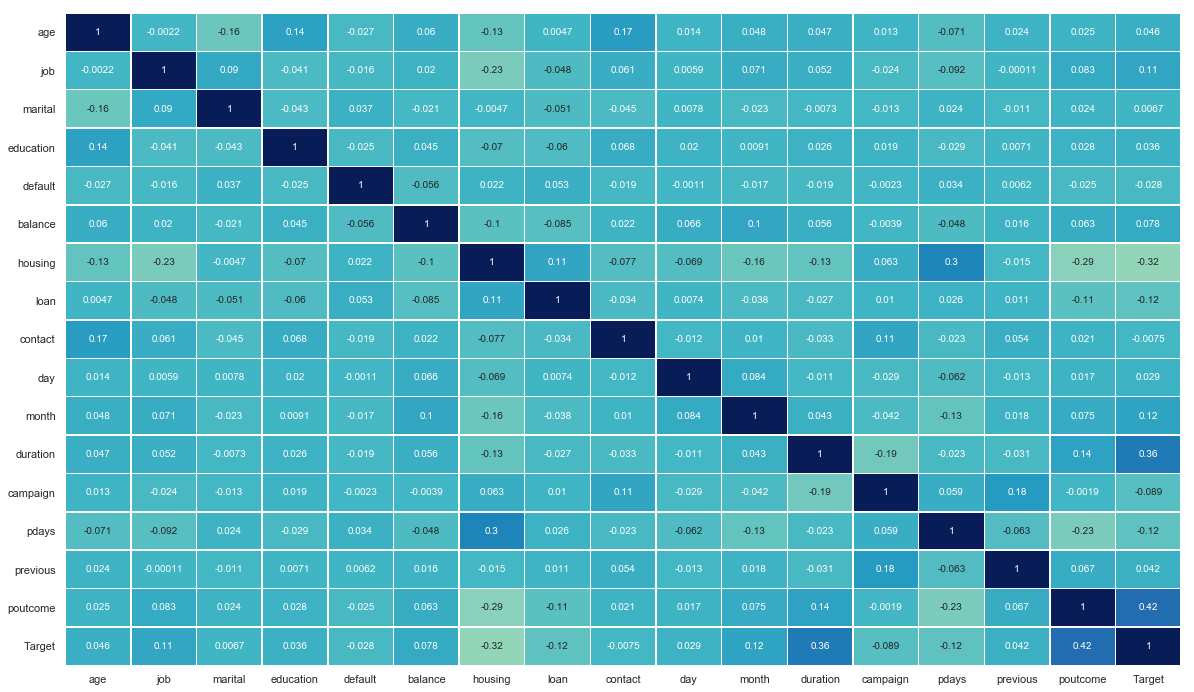

In [53]:
plt.figure(figsize=(20,12))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

Visualizing using boxplot

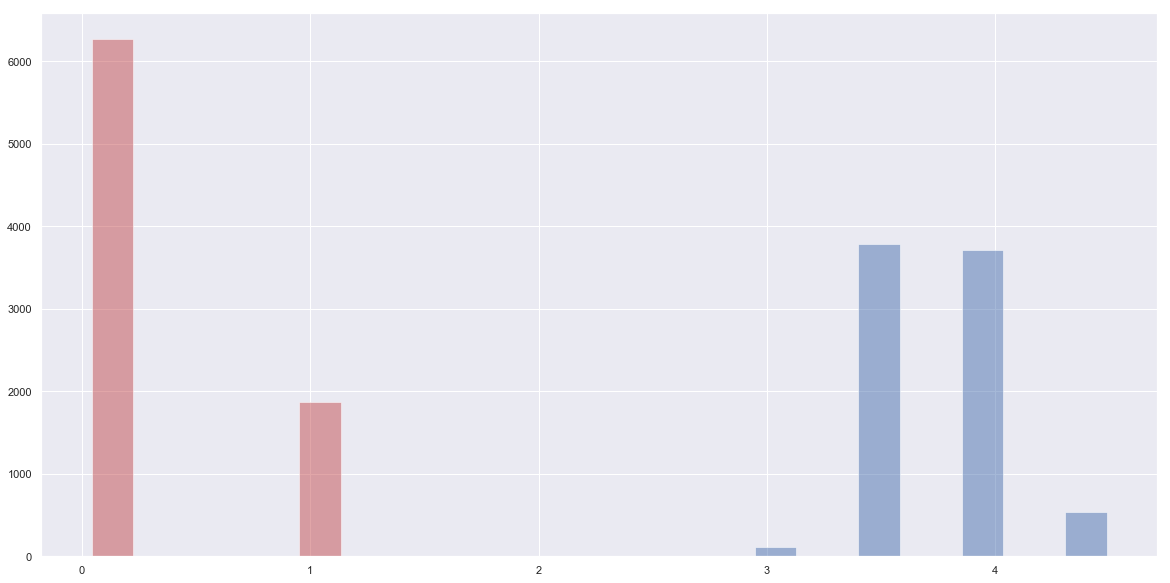

Histogram plot for Target against  age


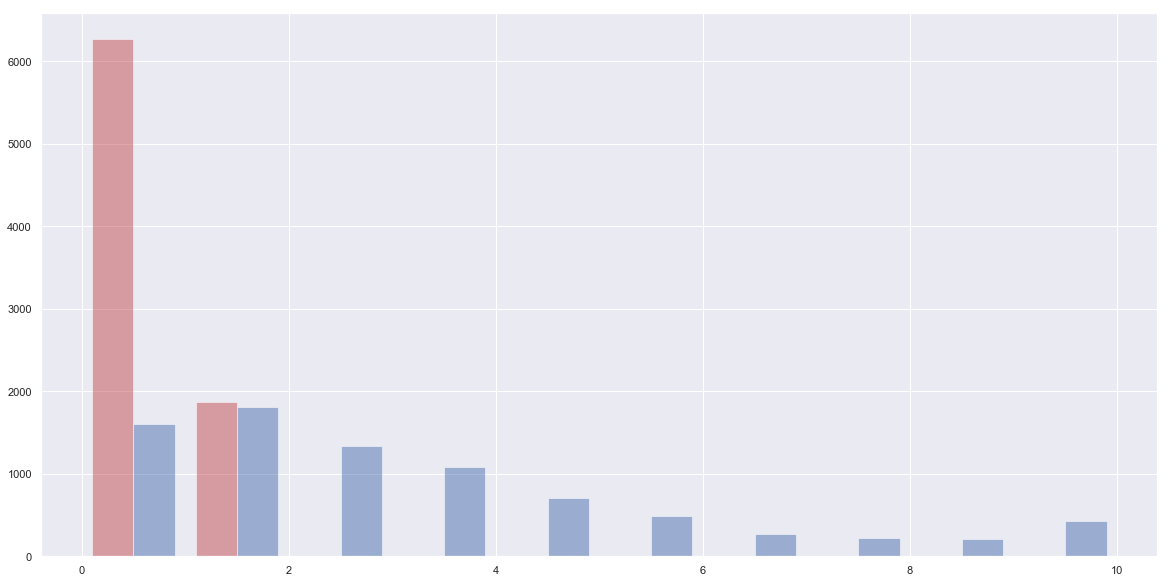

Histogram plot for Target against  job


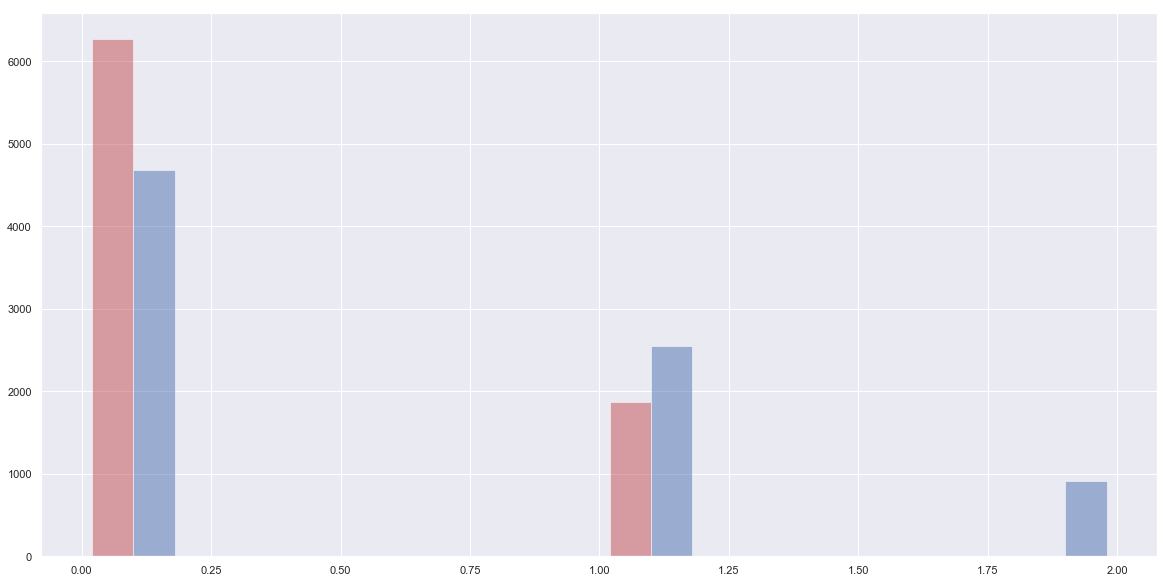

Histogram plot for Target against  marital


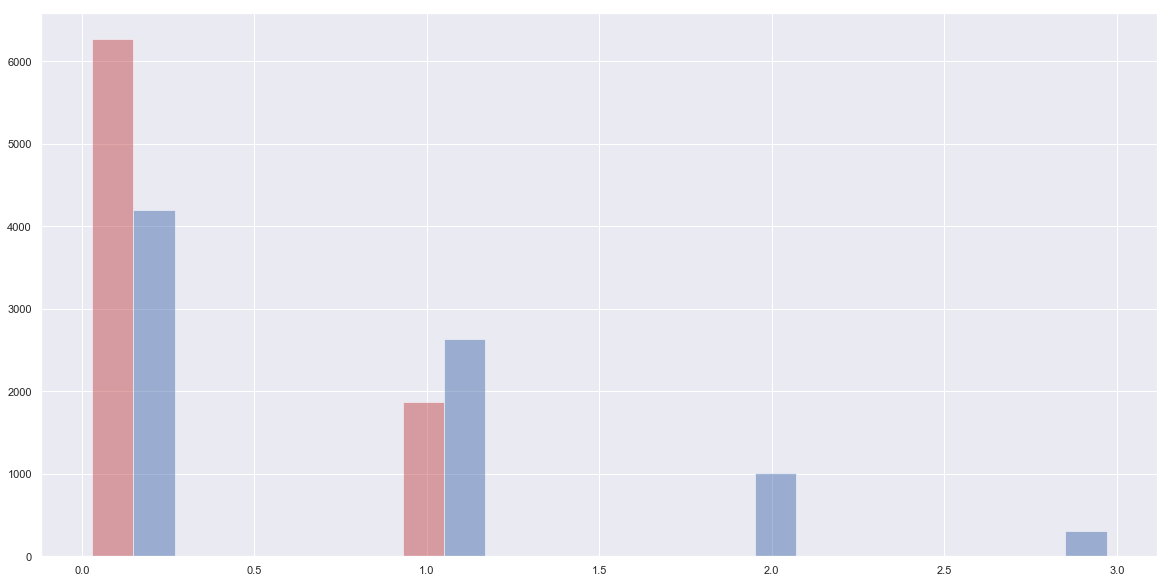

Histogram plot for Target against  education


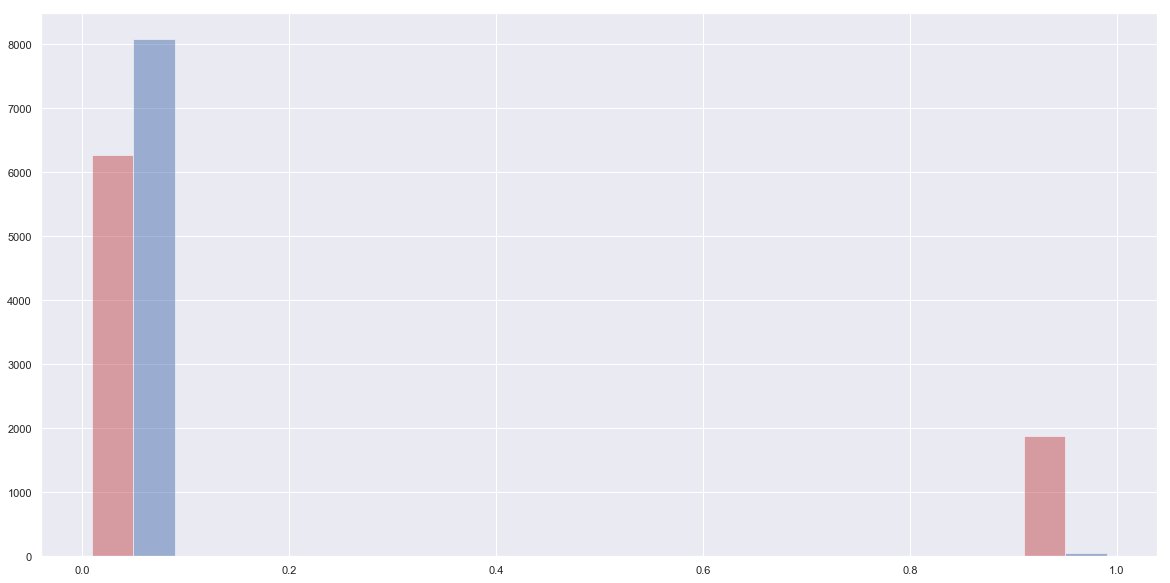

Histogram plot for Target against  default


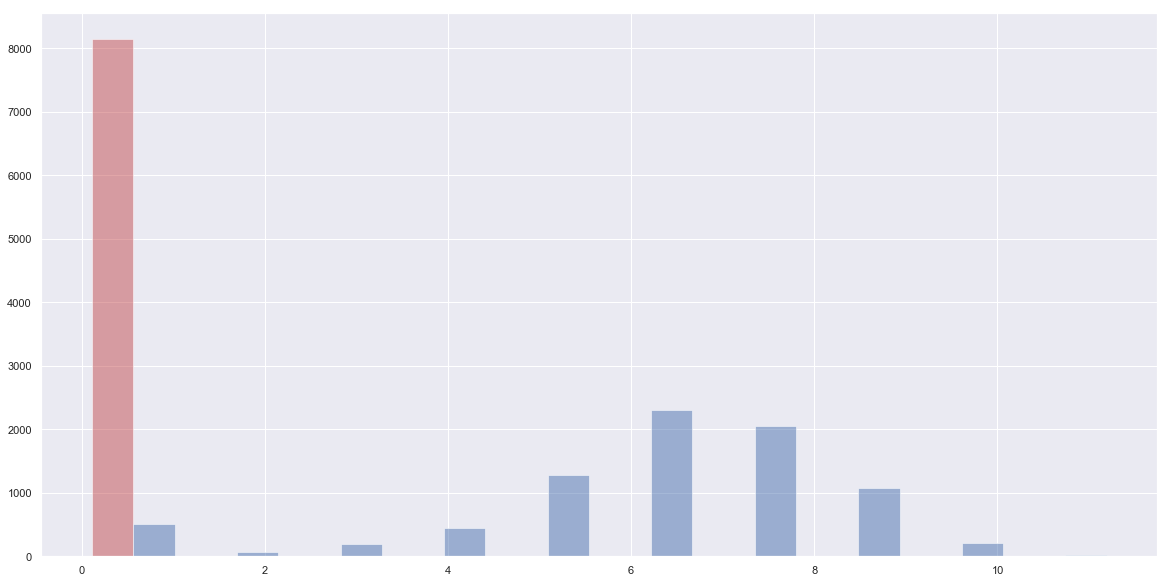

Histogram plot for Target against  balance


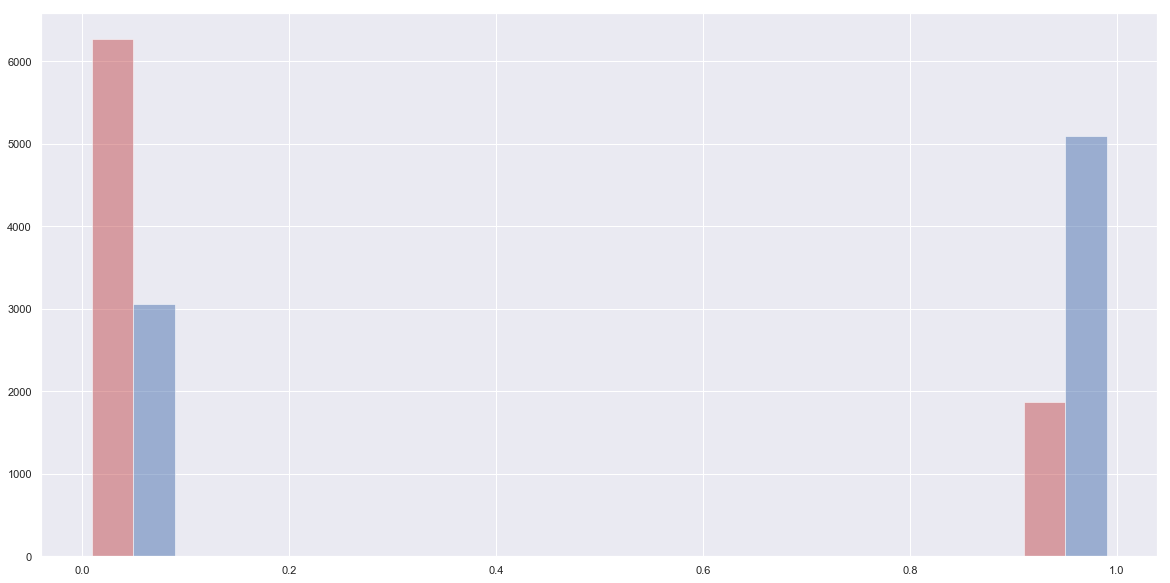

Histogram plot for Target against  housing


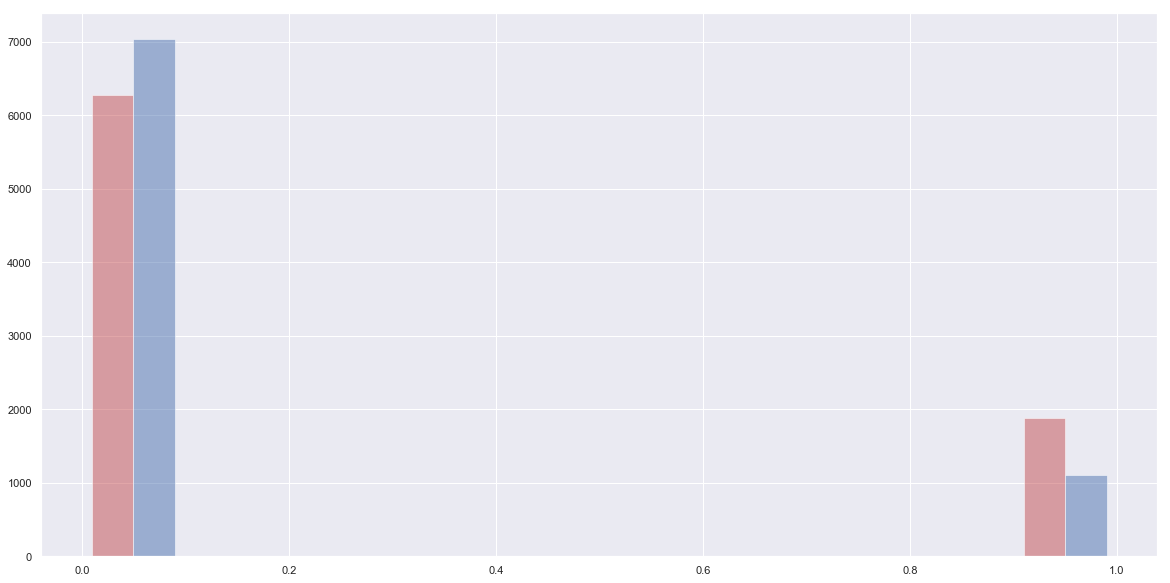

Histogram plot for Target against  loan


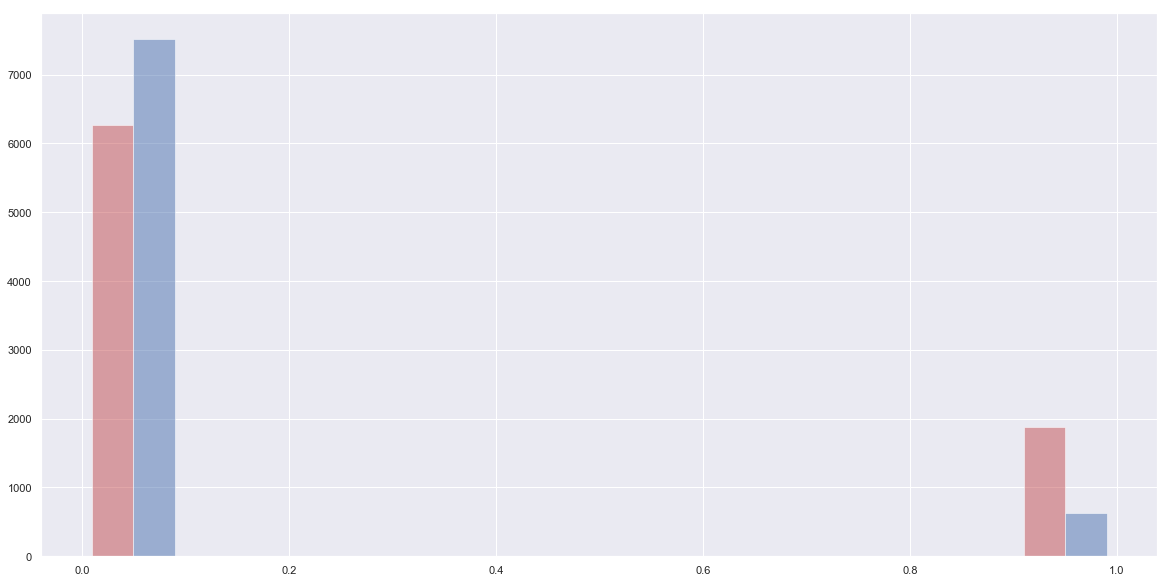

Histogram plot for Target against  contact


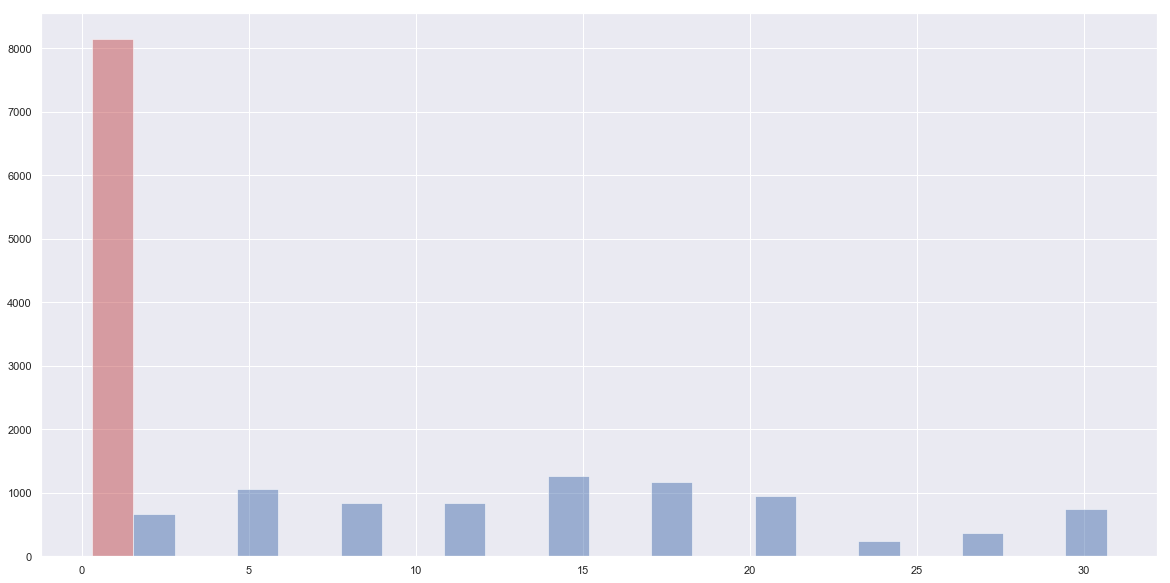

Histogram plot for Target against  day


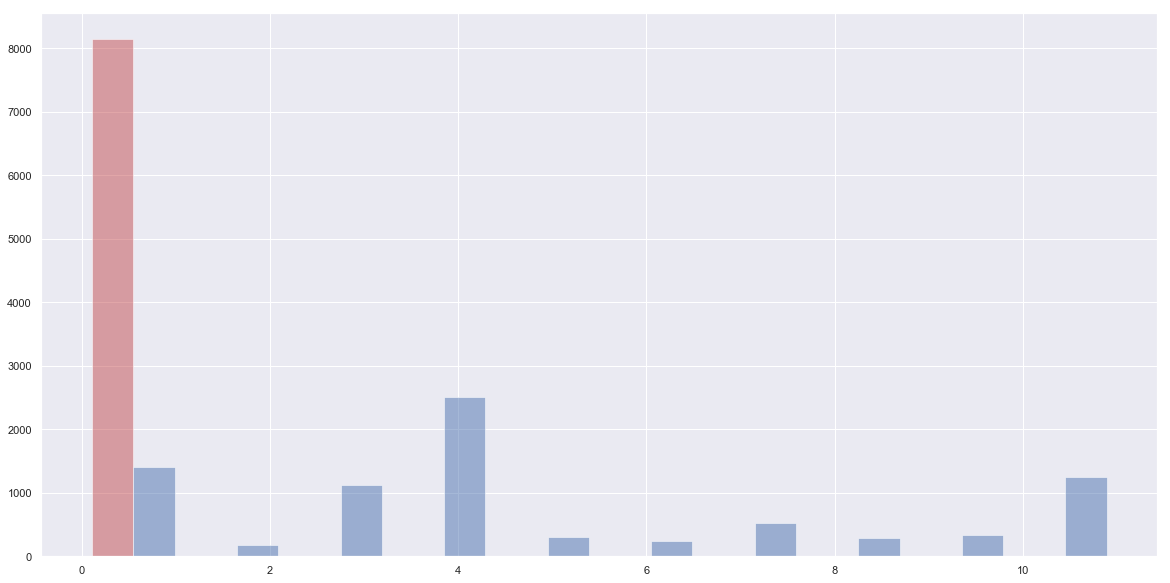

Histogram plot for Target against  month


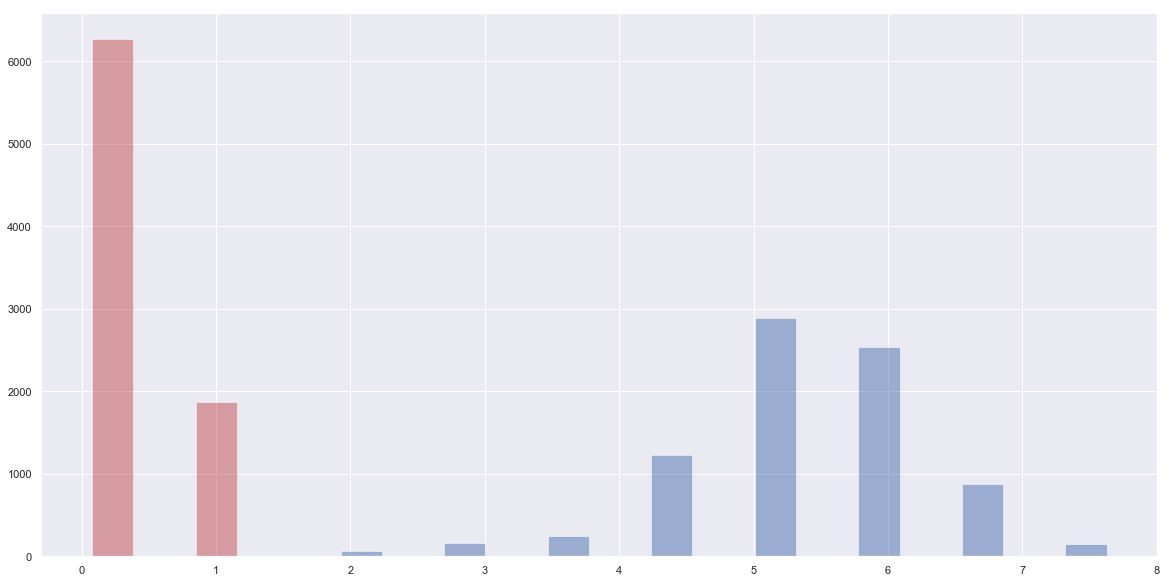

Histogram plot for Target against  duration


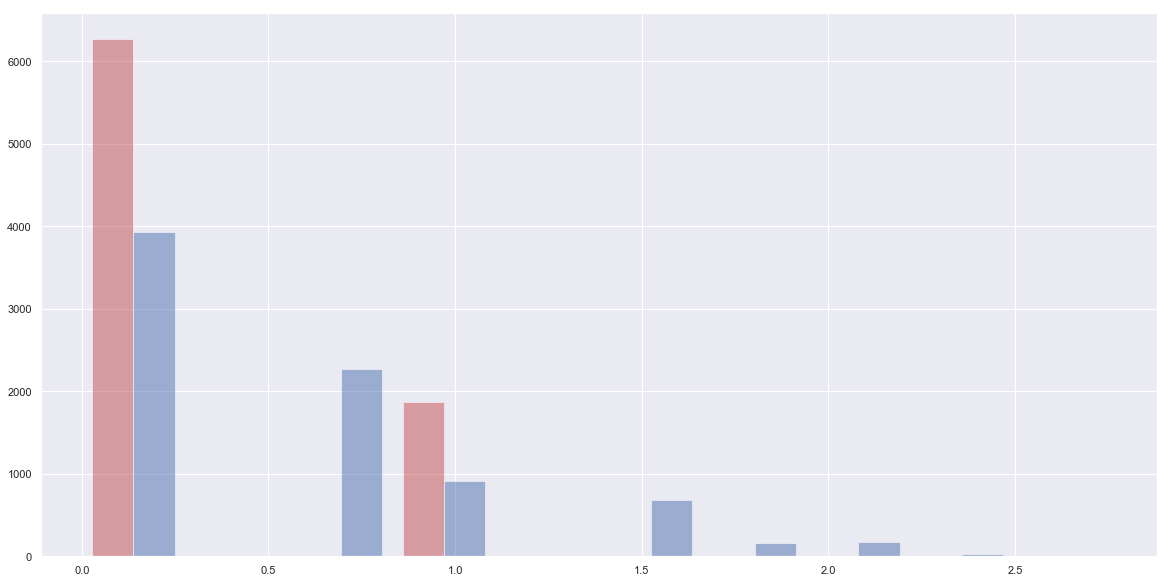

Histogram plot for Target against  campaign


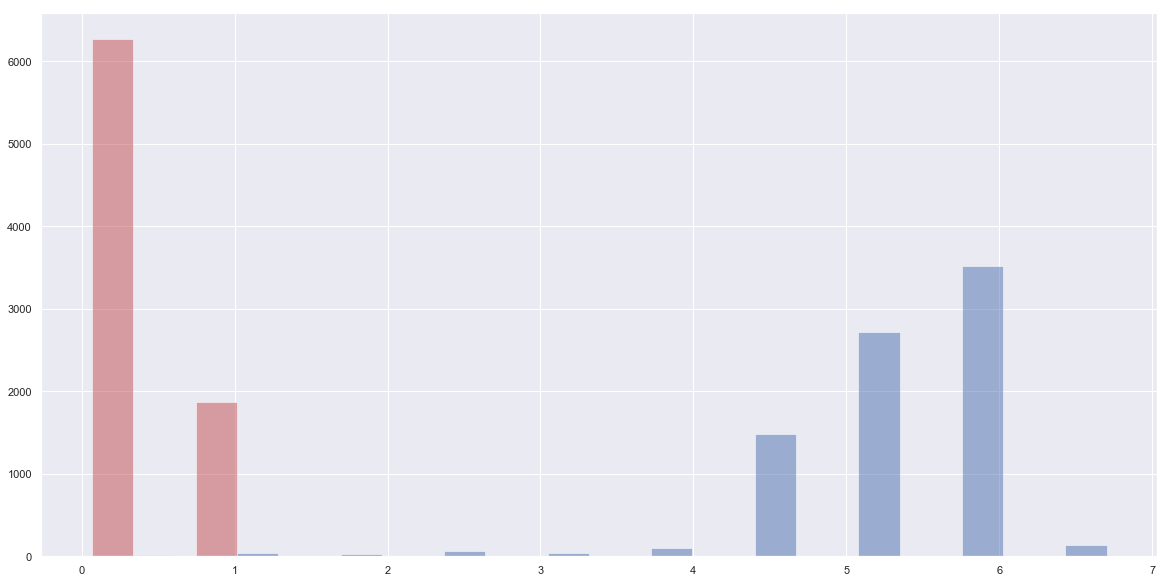

Histogram plot for Target against  pdays


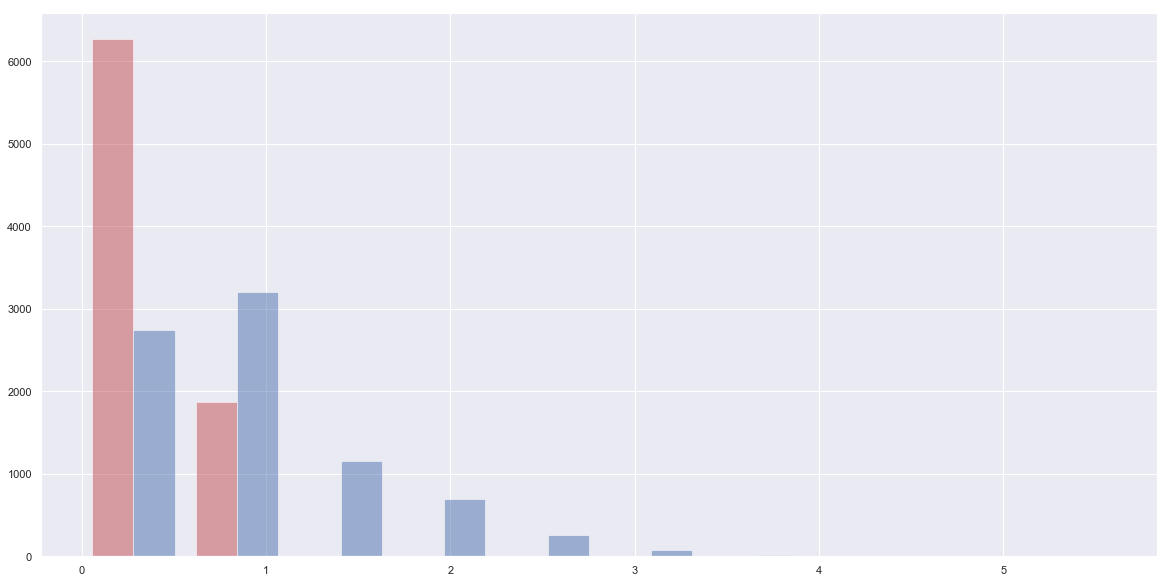

Histogram plot for Target against  previous


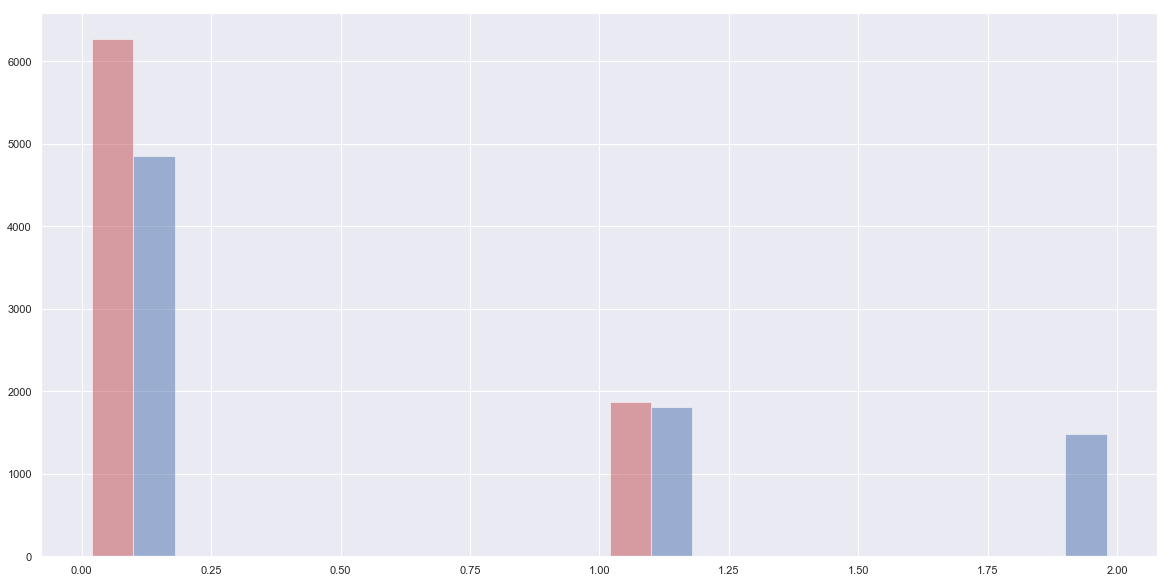

Histogram plot for Target against  poutcome


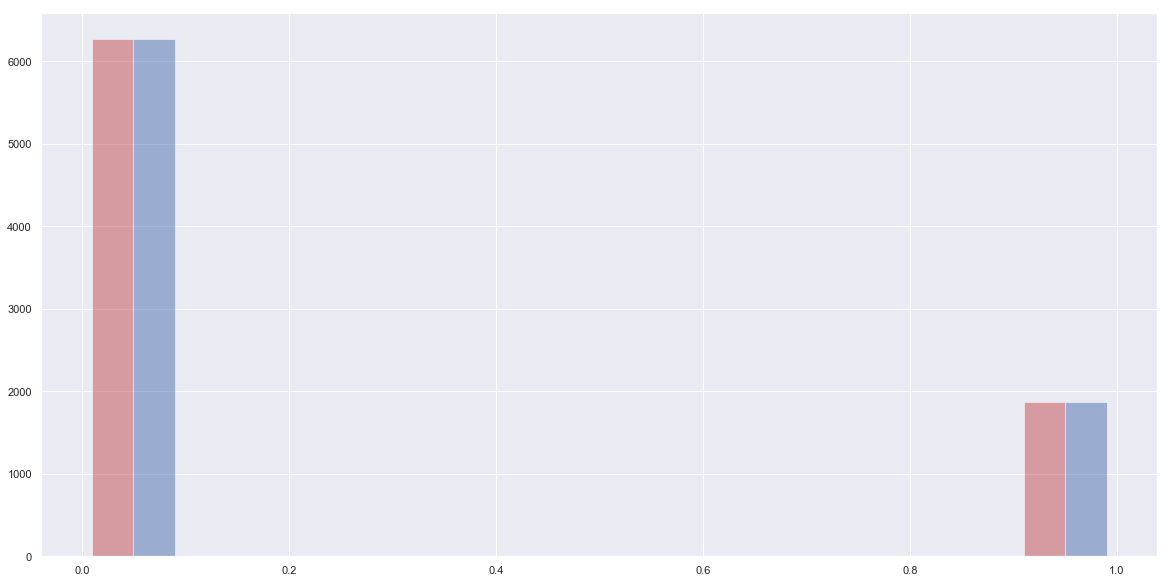

Histogram plot for Target against  Target


In [54]:
for column in list(df.columns):
    sns.set(rc={'figure.figsize':(20,10)})
    plt.hist([df['Target'], df[column]], color=['r','b'], alpha=0.5)
    plt.show()
    print "Histogram plot for Target against ", column

None of the variables has a very strong relationship with the target variable

poutcome seems to have the best correlation however

I am selecting the following: 'housing', 'poutcome', 'duration', 'education', 'pdays', 'loan', 'age', 'campaign', 'day', 'default', 'previous', 'balance', 'job' 

Adding month, contact and marital seem to reduce the overall performance of the models, contact and marital also have the weakest correlation with the target variable

# Prepare the data for analytics

In [55]:
# checking attribute datatypes
df.dtypes
# all the attributes seem to be in the right data type, that is numeric

age          float64
job          float64
marital        int64
education      int64
default        int64
balance      float64
housing        int64
loan           int64
contact      float64
day            int64
month          int64
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome     float64
Target         int64
dtype: object

### 2. Get the data model ready.

In [56]:
x = df[['housing', 'poutcome', 'duration', 'education', 'pdays', 'loan', 'age', 'campaign', 'day', 'default', 'previous', 'balance', 'job']]
y = df[['Target']]


### 3. Transform the data i.e. scale / normalize if required

In [57]:
# During the data cleaning of pollution step we had already done a logarithm transformation on the dat, whats left now
# is the dummy variables transformation
x = pd.get_dummies(x, drop_first=True)

### 4. Create the training set and test set in ratio of 70:30

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.3)

## Create Ensemble model

### 1.1 model using Logistic Regression 

In [59]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
y_predict = logreg.predict(x_test)

In [61]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8387096774193549

Testing accuracy 0.8347648261758691

Confusion Matrix


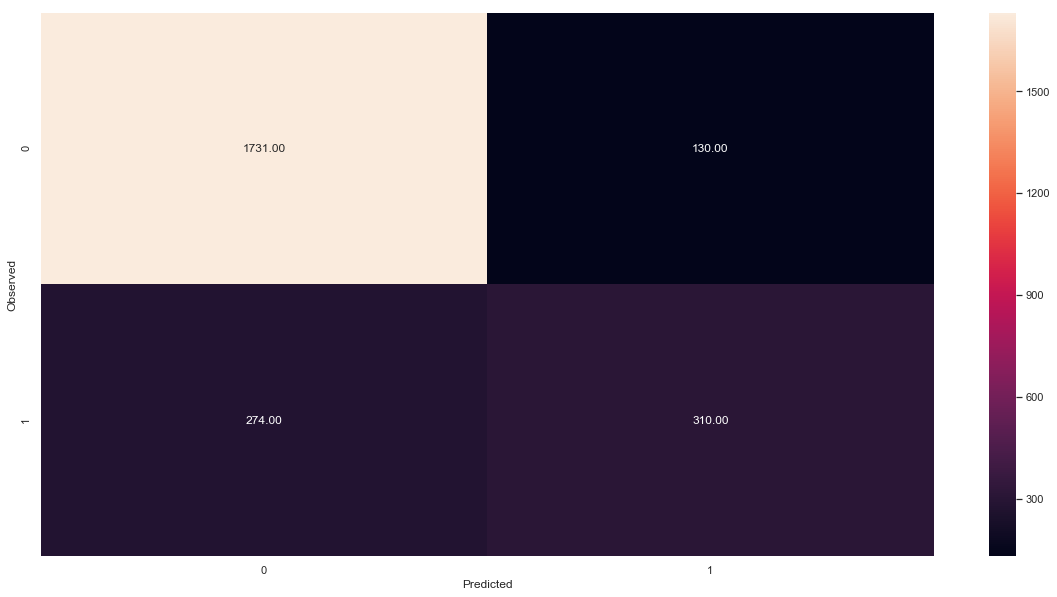

None

Recall: 0.5308219178082192

Precision: 0.7045454545454546

F1 Score: 0.60546875

Roc Auc Score: 0.7304835005483868


In [62]:
print "Trainig accuracy",logreg.score(x_train,y_train)
print
print "Testing accuracy",logreg.score(x_test, y_test)
print
print 'Confusion Matrix'
print draw_cm(y_test,y_predict)
print
print "Recall:",recall_score(y_test,y_predict)
print
print "Precision:",precision_score(y_test,y_predict)
print
print "F1 Score:",f1_score(y_test,y_predict)
print
print "Roc Auc Score:",roc_auc_score(y_test,y_predict)

### 1.2 model using Decision Tree algorithm

In [63]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [64]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

0.8448457223001402
0.8319018404907975


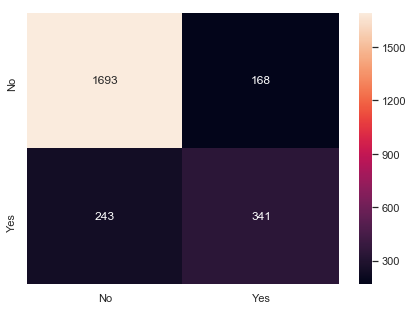


Recall: 0.583904109589041

Precision: 0.6699410609037328

F1 Score: 0.6239707227813358

Roc Auc Score: 0.7468150316886634


In [65]:
y_predict = dTree.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()
print
print "Recall:",recall_score(y_test,y_predict)
print
print "Precision:",precision_score(y_test,y_predict)
print
print "F1 Score:",f1_score(y_test,y_predict)
print
print "Roc Auc Score:",roc_auc_score(y_test,y_predict)

In [66]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = x_train.columns))

                Imp
housing    0.075597
poutcome   0.637581
duration   0.286822
education  0.000000
pdays      0.000000
loan       0.000000
age        0.000000
campaign   0.000000
day        0.000000
default    0.000000
previous   0.000000
balance    0.000000
job        0.000000


#### From the feature importance dataframe we can infer that poutcome, duration and housing are the variables that impact wine quality

### 2.1 model using ensemble - Bagging

In [67]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion='entropy')

In [68]:
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Print the accuracy of the model & print the confusion matrix

In [69]:
print("Train: %.2f" % model_entropy.score(x_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(x_test, y_test))  # performance on test data

Train: 1.00
Test: 0.80


#### As seen above, the model is overfit. so we will use a max_depth of 3 to regularize and prune

In [70]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
clf_pruned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
print("Train: %.2f" % clf_pruned.score(x_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(x_test, y_test))  # performance on test data

Train: 0.84
Test: 0.84


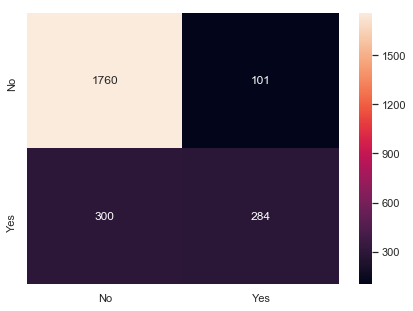


Recall: 0.4863013698630137

Precision: 0.7376623376623377

F1 Score: 0.586171310629515

Roc Auc Score: 0.716014736516676


In [72]:
# Confusion matrix
preds_train = clf_pruned.predict(x_train)
preds_test = clf_pruned.predict(x_test)

acc_DT = accuracy_score(y_test, preds_test)
# pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])
cm=metrics.confusion_matrix(y_test, preds_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()
print
print "Recall:",recall_score(y_test,preds_test)
print
print "Precision:",precision_score(y_test,preds_test)
print
print "F1 Score:",f1_score(y_test,preds_test)
print
print "Roc Auc Score:",roc_auc_score(y_test,preds_test)

In [73]:
## Calculating feature importance
features = [col for col in df.columns if col != 'Target']

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
job,0.561619
marital,0.358443
age,0.079938
education,0.000000
campaign,0.000000
default,0.000000
contact,0.000000
month,0.000000
duration,0.000000
loan,0.000000


#### From the feature importance dataframe, similar to that of the decision tree, we can infer that poutcome, duration and housing are the variables that impact wine quality

In [74]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.835992


### Apply the Random forest model and print the accuracy of Random forest Model

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)

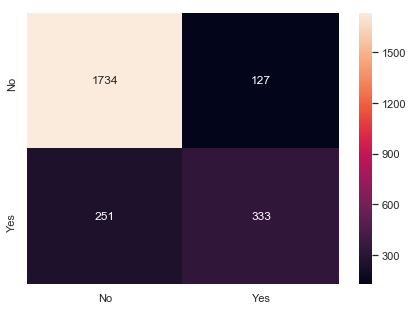


accuracy: 0.845398773006135

Recall: 0.5702054794520548

Precision: 0.7239130434782609

F1 Score: 0.6379310344827587

Roc Auc Score: 0.7509812996400521


In [76]:
pred_RF = rfcl.predict(x_test)
acc_RF = accuracy_score(y_test, pred_RF)

cm=metrics.confusion_matrix(y_test, pred_RF, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()
print
print "accuracy:", acc_RF
print
print "Recall:",recall_score(y_test,pred_RF)
print
print "Precision:",precision_score(y_test,pred_RF)
print
print "F1 Score:",f1_score(y_test,pred_RF)
print
print "Roc Auc Score:",roc_auc_score(y_test,pred_RF)

In [77]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.835992
0,Random Forest,0.845399


### 2.2 model using ensemble - Boosting

In [78]:
# Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(x_train, y_train)

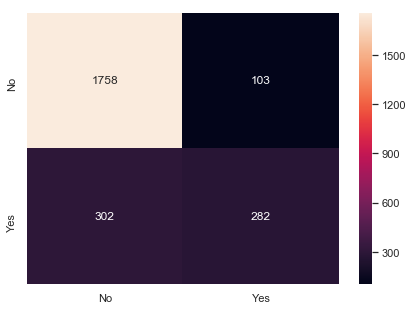


accuracy: 0.8343558282208589

Recall: 0.4828767123287671

Precision: 0.7324675324675325

F1 Score: 0.5820433436532508

Roc Auc Score: 0.7137650622363879


In [79]:
pred_AB =abcl.predict(x_test)
acc_AB = accuracy_score(y_test, pred_AB)

cm=metrics.confusion_matrix(y_test, pred_AB, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()
print
print "accuracy:", acc_AB
print
print "Recall:",recall_score(y_test,pred_AB)
print
print "Precision:",precision_score(y_test,pred_AB)
print
print "F1 Score:",f1_score(y_test,pred_AB)
print
print "Roc Auc Score:",roc_auc_score(y_test,pred_AB)

In [80]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.835992
0,Random Forest,0.845399
0,Adaboost,0.834356


### Apply Bagging Classifier Algorithm and print the accuracy.

In [81]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(x_train, y_train)

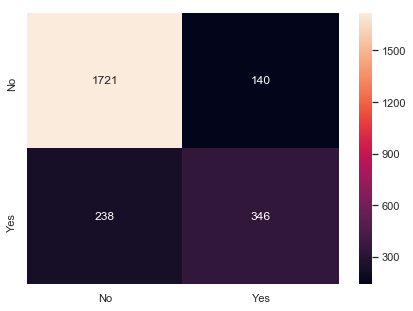


accuracy: 0.845398773006135

Recall: 0.5924657534246576

Precision: 0.7119341563786008

F1 Score: 0.6467289719626168

Roc Auc Score: 0.7586186907907813


In [82]:
pred_BG = bgcl.predict(x_test)
acc_BG = accuracy_score(y_test, pred_BG)

cm=metrics.confusion_matrix(y_test, pred_BG, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()
print
print "accuracy:", acc_BG
print
print "Recall:",recall_score(y_test,pred_BG)
print
print "Precision:",precision_score(y_test,pred_BG)
print
print "F1 Score:",f1_score(y_test,pred_BG)
print
print "Roc Auc Score:",roc_auc_score(y_test,pred_BG)

In [83]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.835992
0,Random Forest,0.845399
0,Adaboost,0.834356
0,Bagging,0.845399


### Apply Gradient boost Classifier Algorithm and print the accuracy.

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(x_train, y_train)

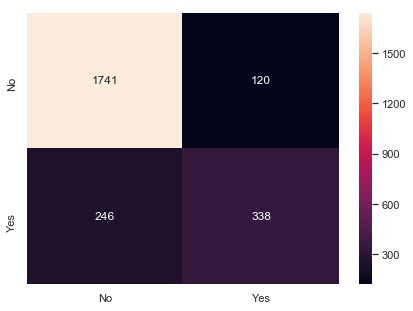


accuracy: 0.8503067484662576

Recall: 0.5787671232876712

Precision: 0.7379912663755459

F1 Score: 0.6487523992322457

Roc Auc Score: 0.7571428308539376


In [85]:
pred_GB = gbcl.predict(x_test)
acc_GB = accuracy_score(y_test, pred_GB)

cm=metrics.confusion_matrix(y_test, pred_GB, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()
print
print "accuracy:", acc_GB
print
print "Recall:",recall_score(y_test,pred_GB)
print
print "Precision:",precision_score(y_test,pred_GB)
print
print "F1 Score:",f1_score(y_test,pred_GB)
print
print "Roc Auc Score:",roc_auc_score(y_test,pred_GB)

In [86]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.835992
0,Random Forest,0.845399
0,Adaboost,0.834356
0,Bagging,0.845399
0,Gradient Boost,0.850307


In summary, Gradient boost seems to have the best accuracy and f1 score out of all the models and should be our selection in this case. 
Recall is a very important metric for this model. Funds allocated for the False Positives(FP) is less efficient as this will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit.

the Bagging classfier has the best recall score of 0.59 and accuracy of 0.845